### 1. 이미지 처리

In [ ]:
!pip install opencv-python

In [ ]:
# pip install opencv-python

import cv2

import numpy as np

from matplotlib import pyplot as plt

# 흑백 이미지로 로드

#image = cv2.imread("../DATA/images/plane.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.imread("../DATA/images/plane.jpg")
print(image.shape)
##############################

# 이미지를 출력

plt.imshow(image, cmap="gray")

plt.axis("off")

plt.show()



In [ ]:
##############################

# 데이터 타입을 확인

type(image)

#

In [ ]:
#############################

# 이미지 데이터를 확인

image



In [ ]:
##############################

# 이미지의 해상도(차원)

image.shape



In [ ]:
##############################

# 컬러로 이미지를 로드

image_bgr = cv2.imread("../DATA/images/plane.jpg", cv2.IMREAD_COLOR)

image_bgr.shape

# 픽셀 확인

#image_bgr

##############################

In [ ]:
# opencv에서는 bgr color를 사용하므로 matplotlib에서 출력하려면 변환해야 함

plt.imshow(image_bgr)

# BGR을 RGB로 변환

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 이미지를 출력

plt.imshow(image_rgb)

plt.axis("off")

plt.show()

In [ ]:
# 이미지 저장

cv2.imwrite("../DATA/images/plane_new.jpg", image)

In [ ]:
# 이미지 크기 변경

# 이미지 사이즈를 조절하는 이유

# 1. 다양한 사이즈의 이미지를 데이터 분석에 사용하려면 사이즈를 통일해야 함

# 2. 이미지 크기를 줄여서 메모리 사용량을 줄일 수 있음

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 크기를 50x50 픽셀로 변환

image_50x50 = cv2.resize(image, (50, 50))

print(image_50x50.shape)

# 이미지를 출력

plt.imshow(image_50x50, cmap="gray")

plt.axis("off")

plt.show()

In [ ]:
# 이미지 자르기

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 열의 처음 절반과 모든 행을 선택

image_cropped = image[:,:128]

# 이미지를 출력

plt.imshow(image_cropped, cmap="gray")

plt.show()

In [ ]:
# 이미지 흐리게 하기

# 이미지를 흐리게 하려면 각 픽셀을 주변 픽셀의 평균값으로 변환

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 흐리게

# 커널 사이즈 10x10, 커널 사이즈가 클수록 이미지가 더 부드러워지게 됨

image_blurry = cv2.blur(image, (10,10))

# 이미지를 출력

plt.imshow(image_blurry, cmap="gray"), plt.axis("off")

plt.show()

In [ ]:
# 커널을 만드는 방법

# 5x5 커널

kernel = np.ones((5,5)) / 25.0

# 커널의 값을 모두 더하면 1

print(sum(kernel.flatten()))

# 커널을 확인

print(kernel)

In [ ]:
# 커널을 적용

#src: 이미지

#ddepth: 이미지 깊이(자료형 크기). -1이면 입력과 동일

#kernel: 커널 행렬

image_kernel = cv2.filter2D(image, -1, kernel)

# 이미지를 출력

plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# 이미지를 선명하게 처리

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 중앙 픽셀을 부각하는 커널

kernel = np.array([[0, -1, 0],

                   [-1, 5,-1],

                   [0, -1, 0]])

# 이미지를 선명하게 처리

image_sharp = cv2.filter2D(image, -1, kernel)

# 이미지를 출력

plt.imshow(image_sharp, cmap="gray"), plt.axis("off")

plt.show()

#이미지의 경계선에서 대비가 강조되게 됨

In [ ]:
# 대비 향상

# 흑백 이미지로 로드

image = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상시킴

image_enhanced = cv2.equalizeHist(image)

# 이미지를 출력

plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")

plt.show()

In [ ]:
#경계선 감지 : 경계선은 많은 정보가 담긴 영역

#정보가 적은 영역을 제거하고 대부분의 정보가 담긴 이미지 영역을 구분할 수 있음

# 흑백 이미지로 로드

image_gray = cv2.imread("../DATA/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산

median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정

lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))

upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 경계선 감지 함수를 적용

image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# 이미지를 출력

plt.imshow(image_canny, cmap="gray"), plt.axis("off")

plt.show()

### 2. 이미지 분류

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

def percent(x):

    return x / np.sum(x)

def softmax(x):

    exp_x = np.exp(x)

    return exp_x / np.sum(exp_x)

In [ ]:
#value=np.linspace(-2.5, 2.5, 5) #무한대 문제 발생

#value=np.linspace(0, 2.5, 5) # 출력값이 0이면 학습이 되지 않음

value=np.linspace(1.5, 2.5, 5)

p=percent(value)

s=softmax(value)

print('value:',value)

print('percentage:',p)

print('softmax:',s)

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)

plt.plot(value,'r.-',label='value')

plt.subplot(1,2,2)

plt.plot(p, 'b.-',label='percent')

plt.plot(s, 'g.-',label='softmax')

plt.legend()

plt.show()

# percent - 직선형태, 활성화함수로 사용하기 어려움

# sigmoid와 비슷한 형태

# 대소관계는 변하지 않고 큰 값은 더 크게, 작은 값은 더 작게 표현되도록 가중치를 조정함

### 2-1 경사하강법

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',

          'figure.figsize': (8, 5),

         'axes.labelsize': 'large',

         'axes.titlesize':'large',

         'xtick.labelsize':'medium',

         'ytick.labelsize':'medium',

         'lines.markersize': 20,

          'lines.linewidth': 3

         }

pylab.rcParams.update(params)

In [ ]:
X_SCALE = 100

In [ ]:
#1차 실험

def get_y(x):

  return np.cos(x/X_SCALE) + 1

In [ ]:
def get_direction(error, px, cx):

  x_dir = (((cx-px) > 0)-0.5) * 2

  error_dir = -((error > 0)-0.5) * 2

  gradient_dir = x_dir * error_dir

  return gradient_dir * X_SCALE

def get_error(cy, py):

  return cy-py

def set_title(epoch, direction, error, lr):

  title_str = "epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.2f" % (epoch, direction, error, lr)

  plt.title(title_str)

In [ ]:
N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE

y = get_y(x)

p = np.random.randint(0, x.shape[0]-1)

cx = x[p]

cy = y[p]

global global_n

global_n = 0

In [ ]:
#2차 실험(학습률을 바꾸면서 테스트) - 국소 최적해와 전역 최적해
learning_rate = 0.1

#learning_rate = 0.5

current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction

ny = get_y(nx)

In [ ]:
from IPython import display

error=[]

for i in range(20):

  px, py = cx, cy # previous

  cx, cy = nx, ny # current

  d_error = get_error(cy, py)

  error.append(d_error)

  current_direction = get_direction(d_error, px, cx) * learning_rate

  nx = cx + current_direction

  ny = get_y(nx)

  display.clear_output(wait=True)

  display.display(plt.gcf())

  plt.plot(x,y)

  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)

  plt.plot(cx, cy, 'r.')

  plt.plot([cx, nx], [cy, ny], 'g-')

  plt.plot([cx, cx], [cy, ny])

  set_title((i+2), current_direction, d_error, learning_rate)

  plt.legend(['Error', 'Previous', 'Current', 'Next'])

  plt.show(block=False)

  plt.pause(0.5)

print('error:',error)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',

          'figure.figsize': (8, 5),

         'axes.labelsize': 'large',

         'axes.titlesize':'large',

         'xtick.labelsize':'medium',

         'ytick.labelsize':'medium',

         'lines.markersize': 20,

          'lines.linewidth': 3

         }

pylab.rcParams.update(params)

###############################

X_SCALE = 100

###############################

def get_y(x):

  xn = x/X_SCALE

  return np.cos(xn) + (np.sin(xn*10)*0.3)

###############################

def get_direction(error, px, cx):

  x_dir = (((cx-px) > 0)-0.5) * 2

  error_dir = -((error > 0)-0.5) * 2

  gradient_dir = x_dir * error_dir

  return gradient_dir * X_SCALE

def get_error(cy, py):

  return cy-py

###############################

def set_title(epoch, direction, error, lr):

  title_str = "epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.5f" % (epoch, direction, error, lr)

  plt.title(title_str)

###############################

N = 100

x = np.linspace(0, np.pi*2, N) * X_SCALE

y = get_y(x)

p = np.random.randint(0, x.shape[0]-1)

cx = x[p]

cy = y[p]

global global_n

global_n = 0

###############################

#국소 최적해 문제를 해결하기 위한 방안 : rmsprop, Adagrad 등의 알고리즘

###############################

#3차 실험(학습률을 바꾸면서 테스트)

#learning_rate = 0.5

learning_rate = 3.0

current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction

ny = get_y(nx)

###############################

from IPython import display

error=[]

lr=[] #추가

for i in range(20):

  px, py = cx, cy # previous

  cx, cy = nx, ny # current

  d_error = get_error(cy, py)

  #3차 실험(학습률 조절)

  if d_error<1.0:    

    learning_rate=(learning_rate * 0.5)

    if learning_rate < 1e-3:

      break

  error.append(d_error)

  lr.append(learning_rate) #추가

  current_direction = get_direction(d_error, px, cx) * learning_rate

  nx = cx + current_direction

  ny = get_y(nx)

  display.clear_output(wait=True)

  display.display(plt.gcf())

  plt.plot(x,y)

  plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)

  plt.plot(cx, cy, 'r.')

  plt.plot([cx, nx], [cy, ny], 'g-')

  plt.plot([cx, cx], [cy, ny])

  set_title((i+2), current_direction, d_error, learning_rate)

  plt.legend(['Error', 'Previous', 'Current', 'Next'])

  plt.show(block=False)

  plt.pause(0.5)

print('error:',error)

print('lr:',lr) #추가

###############################

### 3) 정규화- dropout

In [ ]:
import torch

USE_CUDA = torch.cuda.is_available()

DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
EPOCHS = 5

BATCH_SIZE = 64

In [ ]:
from torchvision import transforms, datasets

#mnist 데이터셋 다운로드, transforms.Compose 텐서로 바꾸면서 0~1 정규화

train_loader = torch.utils.data.DataLoader(

    datasets.MNIST('c:/data',

                   train=True,

                   download=True,

                   transform=transforms.Compose([

                       transforms.RandomHorizontalFlip(), #랜덤 가로방향 전환

                       transforms.ToTensor(),

                       transforms.Normalize((0.1307,), (0.3081,))
                                             #평균,   # 표준편차
                   ])),

    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(

    datasets.MNIST('c:/data',

                   train=False,

                   transform=transforms.Compose([

                       transforms.ToTensor(),

                       transforms.Normalize((0.1307,), (0.3081,))

                   ])),

    batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
import torch.nn as nn

import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, dropout_p=0.2):

        super(Net, self).__init__()

        self.fc1 = nn.Linear(784, 256)

        self.fc2 = nn.Linear(256, 128)

        self.fc3 = nn.Linear(128, 10)

        self.dropout_p = dropout_p

    def forward(self, x):

        x = x.view(-1, 784)

        x = F.relu(self.fc1(x))

        x = F.dropout(x, training=self.training,

                      p=self.dropout_p)

        x = F.relu(self.fc2(x))

        x = F.dropout(x, training=self.training,

                      p=self.dropout_p)

        x = self.fc3(x)

        return x

In [ ]:
import torch.optim as optim

#과적합과 정규화

model        = Net(dropout_p=0.2).to(DEVICE)

optimizer    = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def train(model, train_loader, optimizer):

    model.train()

    for _, (data, target) in enumerate(train_loader):

        data, target = data.to(DEVICE), target.to(DEVICE)

        optimizer.zero_grad()

        output = model(data)

        loss = F.cross_entropy(output, target)

        loss.backward()

        optimizer.step()

In [ ]:
def evaluate(model, test_loader):

    model.eval()

    test_loss = 0

    correct = 0

    with torch.no_grad():

        for data, target in test_loader:

            data, target = data.to(DEVICE), target.to(DEVICE)

            output = model(data)

            #크로스 엔트로피 계산

            test_loss += F.cross_entropy(output, target,

                                         reduction='sum').item()

            # softmax 연산(output에서 최대값 선택)

            pred = output.max(1, keepdim=True)[1]

            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    test_accuracy = 100. * correct / len(test_loader.dataset)

    return test_loss, test_accuracy

In [ ]:
for epoch in range(1, EPOCHS + 1):

    train(model, train_loader, optimizer)

    test_loss, test_accuracy = evaluate(model, test_loader)

    

    print(f'[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')



### 4) 제너레이터

In [ ]:
import tensorflow.keras.datasets as ds

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()

x_train=x_train.astype('float32'); x_train/=255

x_train=x_train[0:15,]; y_train=y_train[0:15,]    

class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']



In [ ]:
plt.figure(figsize=(20,2))

for i in range(15):

    plt.subplot(1,15,i+1)

    plt.imshow(x_train[i])

    plt.xticks([]); plt.yticks([])

    plt.title(class_names[int(y_train[i])])

plt.show()  

In [ ]:
batch_size=4

# rotation_range 각도 범위 내에서 회전

generator=ImageDataGenerator(rotation_range=20.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

gen=generator.flow(x_train,y_train,batch_size=batch_size)

for a in range(3):
    img,label=gen.next()    # batch size만큼 생성

    plt.figure(figsize=(8,2.4))

    plt.suptitle("Generatior trial "+str(a+1))

    for i in range(batch_size):

        plt.subplot(1,batch_size,i+1)

        plt.imshow(img[i])

        plt.xticks([]); plt.yticks([])

        plt.title(class_names[int(label[i])])

    plt.show()


### 5) 이미지 분류

In [ ]:
import zipfile  

with zipfile.ZipFile('c:/data/mnist/dataset.zip') as zip_ref:  

    zip_ref.extractall('c:/data/mnist/')

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1,data_home='c:/data/mnist', as_frame=False)

mnist.data[:5]

In [ ]:
import numpy as np

X, y = mnist["data"], mnist["target"]

y = y.astype(np.int64)

print(X.shape, y.shape)

In [ ]:
import matplotlib

import matplotlib.pyplot as plt

some_digit = X[36000]

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image)          

plt.show()

In [ ]:
def plot_digit(data):

    image = data.reshape(28, 28)

    plt.imshow(image, cmap = matplotlib.cm.binary)

    plt.axis("off")

In [ ]:
plot_digit(X[36000])
y[36000]

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
# 이진 분류기
y_train_5 = (y_train == 5)

y_test_5 = (y_test == 5)

In [ ]:
#확률적 경사하강법 분류모형(온라인학습)

#확률적 경사하강법(Stochastic Gradient Descent, SGD)

#무작위로 1개의 데이터를 추출하여 기울기를 계산

#빠르게 최적점을 찾을 수 있는 알고리즘

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=0)

sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
#교차검증

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone

#클래스 비율이 유지되는 교차검증

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):

    #분류모형을 복제(데이터는 복제하지 않음)

    clone_clf = clone(sgd_clf)

    #학습용,검증용 구분

    X_train_folds = X_train[train_index]

    y_train_folds = y_train_5[train_index]

    X_test_folds = X_train[test_index]

    y_test_folds = y_train_5[test_index]

    #학습

    clone_clf.fit(X_train_folds, y_train_folds)

    #분류

    y_pred = clone_clf.predict(X_test_folds)

    #정확도

    n_correct = sum(y_pred == y_test_folds)

    print(n_correct / len(y_pred))

In [ ]:
#모든 예측결과를 False로 리턴하는 테스트용 클래스

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):

    def fit(self, X, y=None):

        pass

    def predict(self, X):

        # 2원 영배열(행의수는 샘플개수), 0을 False로 리턴

        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()

print(never_5_clf.predict(X_train))

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

#정확도가 높음(이미지의 10%가 5이므로 5가 아니라고 분류하면 100-10=90% 정도의 정확도를 가짐)

#이 모형은 좋은 모형이 아님, 특히 불균형 데이터셋의 경우 정확도는 큰 의미가 없을 수 있음

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(never_5_clf.predict(X_train), y_train_5))

In [ ]:
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix

y_train_pred = sgd_clf.predict(X_train)

#오차행렬

cm=confusion_matrix(y_train_5, y_train_pred)

print(cm)

tn, fp, fn, tp = cm.ravel()

print(tn, fp, fn, tp)

In [ ]:
from sklearn.metrics import precision_score, recall_score

#정밀도 : TP / (TP+FP) , 모형이 1로 분류한 것 중 실제로 1인 것의 비율

print(precision_score(y_train_5, y_train_pred))

print(tp/(tp+fp))

In [ ]:
#민감도(TPR, True Positive Rate) - 1을 1로 잘 맞춘 비율, 재현율(recall)이라고도 함

print(recall_score(y_train_5, y_train_pred))

print(tp/(tp+fn))

In [ ]:
from sklearn.metrics import f1_score

# 정밀도와 재현율의 조화 평균

f1_score(y_train_5, y_train_pred)

# 정밀도와 재현율은 반비례하는 관계 : 정밀도를 높이면 재현율이 떨어지고 재현율이 높아지면 정밀도가 낮아짐

# 정밀도/재현율 트레이드오프라고 함

In [ ]:
#sgd 모형의 판별 함수

y_scores = sgd_clf.decision_function([some_digit])

y_scores

In [ ]:
#판별함수의 값 0을 기준으로 분류하는 경우

threshold = 0

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred # False로 분류됨

In [ ]:
#판별함수의 결과값을 조절함

threshold = -417921

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

In [ ]:
#예측결과가 아닌 결정점수를 리턴하는 교차검증

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

print(y_scores)

print(y_scores.shape)

In [ ]:
from sklearn.metrics import precision_recall_curve

#판별함수의 결과값을 이용하여 모든 임계값에 대한 정밀도와 재현율 계산

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)

    plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)

    plt.xlabel("threshold", fontsize=16)

    plt.legend(loc="upper left", fontsize=16)

    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.xlim([-700000, 700000])

plt.show()

#판별기준을 높이면 정밀도는 높아지고 재현율은 낮아짐

#판별기준을 낮추면 정밀도는 낮아지고 재현율은 높아짐

In [ ]:
def plot_precision_vs_recall(precisions, recalls):

    plt.plot(recalls, precisions, "b-", linewidth=2)

    plt.xlabel("recall", fontsize=16)

    plt.ylabel("precision", fontsize=16)

    plt.axis([0, 1, 0, 1])

    plt.figure(figsize=(8, 6))
    
    plot_precision_vs_recall(precisions, recalls)
    
    plt.show()
    
    #precision과 recall은 반비례 관계

In [ ]:
# ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)

    plt.plot([0, 1], [0, 1], 'k--')

    plt.axis([0, 1, 0, 1])

    plt.xlabel('FPR', fontsize=16)

    plt.ylabel('TPR', fontsize=16)

plt.figure(figsize=(8, 6))

plot_roc_curve(fpr, tpr)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

#면적이 1에 가까울수록 완벽한 모형, 0.5이면 완전한 랜덤 분류기

In [ ]:
#sgd 모형과 비교하기 위하여 랜덤포레스트모형 추가

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

# predict_proba : 랜덤포레스트에서 decision_function() 대신 제공되는 함수

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

In [ ]:
y_probas_forest # 0일 확률, 1일 확률

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # 1일 확률

print(y_scores_forest)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.legend(loc="lower right", fontsize=16)

plt.show()

In [ ]:
#sgd보다 랜덤포레스트 모형의 성능이 더 좋음

roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

precision_score(y_train_5, y_train_pred_forest)

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

In [ ]:
# 다중 분류

In [ ]:
#다중분류를 위해 모든 데이터를 학습에 사용

sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

#내부적으로 10개의 이진분류기를 훈련시키고 각각의 결정점수를 비교하여 가장 점수가 높은 클래스를 선택함

In [ ]:
#판별함수 확인, 클래스별로 10개의 점수가 출력됨

some_digit_scores = sgd_clf.decision_function([some_digit])

print(some_digit_scores)

#가장 높은 점수 출력

print(np.argmax(some_digit_scores))

#라벨(클래스) 리스트

print(sgd_clf.classes_)

#분류한 라벨 이름

print(sgd_clf.classes_[5])

In [ ]:
#일대다전략과 일대일전략

#일대다전략(one versus all, one versus the rest): 각 분류기의 결정점수 중에서 가장 높은 것을 선택하는 전략(0만 찾는 모형, 1만 찾는 모형, 대부분의 알고리즘에서 사용하는 방식)

#일대일전략(one versus one): 0과 1, 0과 2 등으로 각 숫자의 조합마다 여러개의 모형을 만들어서 가장 성능이 좋은 모형을 채택하는 방식(svm에서 사용하는 방식)

#사이킷런에서는 svm일 경우 OvO(일대일전략)을 다른 분류모형일 경우 OvA(일대다전략)을 선택함, 랜덤포레스트모형은 앙상블 모형이므로 사이킷런의 OvA, OvO를 적용하지 않음

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

#일대일전략을 사용하도록 지정하는 방법

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=0))

ovo_clf.fit(X_train, y_train)

ovo_clf.predict([some_digit])

In [ ]:
len(ovo_clf.estimators_) #일대일전략에서 사용하는 분류기의 개수

In [ ]:
pred=ovo_clf.predict(X_test)

np.mean(pred == y_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

#1대다 전략(0과 1~9)

ovr_clf=OneVsRestClassifier(SGDClassifier(max_iter=5, random_state=10))

ovr_clf.fit(X_train, y_train)

In [ ]:
len(ovr_clf.estimators_) #분류기 개수

In [ ]:
pred=ovr_clf.predict(X_test)

np.mean(pred == y_test)

In [ ]:
# 다중 레이블 분류

In [ ]:
#학습시간이 오래 걸림

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) #7,8,9

y_train_odd = (y_train % 2 == 1) #홀수

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

# 7,8,9에 해당되고  홀수이다

### 6) 교차검증

In [ ]:
# 1. K-fold 교차 검증

from sklearn import datasets

from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋을 로드

digits = datasets.load_digits()

digits.data[0]

In [ ]:
import matplotlib.pyplot as plt  

plt.imshow(digits.data[0].reshape(8,8))  

plt.show()

In [ ]:
# 특성 행렬

features = digits.data

target = digits.target

# 표준화 객체

standardizer = StandardScaler()

# 로지스틱 회귀 객체

logit = LogisticRegression()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인

pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증

kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행

cv_results = cross_val_score(pipeline, # 파이프라인

                             features, # 특성 행렬

                             target, # 타깃 벡터

                             cv=kf, # 교차 검증 기법

                             scoring="accuracy", # 평가 지표

                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산

cv_results.mean()

In [ ]:
# 2. ShuffleSplit : 반복횟수에 관계없이 학습용, 검증용 데이터셋을 임의로 지정할 수 있음

# 반복마다 랜덤하게 분할하므로 하나의 샘플이 여러번 포함될 수 있음

from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기(학습용 50%, 검증용 20%)

ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

pipeline=make_pipeline(standardizer, logit)

# 교차검증을 수행

cv_results = cross_val_score(pipeline, # 파이프라인

                             features, # 특성 행렬

                             target, # 타깃 벡터

                             cv=ss, # 교차 검증 기법

                             scoring="accuracy", # 평가 지표

                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산

cv_results.mean()

In [ ]:
# 3. RepeatedKFold 교차검증

from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기(10회 교차검증을 5회 반복)

rk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행

cv_results = cross_val_score(pipeline, # 파이프라인

                             features, # 특성 행렬

                             target, # 타깃 벡터

                             cv=rk, # 교차 검증 기법

                             scoring="accuracy", # 평가 지표

                             n_jobs=-1) # 모든 CPU 코어 사용

# 검증 점수 개수를 확인

print(len(cv_results))

# 평균을 계산

print(cv_results.mean())

In [ ]:
# 4. 하이퍼파라미터 값의 영향을 시각화하기

import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import validation_curve

# 데이터를 로드

digits = load_digits()

# 특성 행렬과 타깃 벡터

features, target = digits.data, digits.target

# 파라미터 값의 범위

param_range = np.arange(1, 250, 2)

# 파라미터 값의 범위를 사용하여 학습용 데이터셋과 검증용 데이터셋의 정확도를 계산

train_scores, test_scores = validation_curve(

    RandomForestClassifier(),

    features,

    target,

    param_name="n_estimators",

    param_range=param_range,

    cv=3,

    scoring="accuracy",

    n_jobs=-1)

# 학습용 데이터셋 점수의 평균과 표준 편차를 계산

train_mean = np.mean(train_scores, axis=1)

train_std = np.std(train_scores, axis=1)

# 검증용 데이터셋 점수의 평균과 표준 편차를 계산

test_mean = np.mean(test_scores, axis=1)

test_std = np.std(test_scores, axis=1)

# 학습용 데이터셋과 검증용 데이터셋의 평균 정확도 점수

plt.plot(param_range, train_mean, label="Training score", color="black")

plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# 학습용 데이터셋과 검증용 데이터셋의 정확도에 대한 표준 편차 그래프

plt.fill_between(param_range, train_mean - train_std,

                 train_mean + train_std, color="gray")

plt.fill_between(param_range, test_mean - test_std,

                 test_mean + test_std, color="gainsboro")

# 그래프를 출력

plt.title("Validation Curve With Random Forest")

plt.xlabel("Number Of Trees")

plt.ylabel("Accuracy Score")

plt.tight_layout()

plt.legend(loc="best")

plt.show()

import zipfile

with zipfile.ZipFile('c:/data/mnist/dataset.zip') as zip_ref:  

    zip_ref.extractall('c:/data/mnist/')

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1,data_home='c:/data/mnist', as_frame=False)

mnist.data[:5]

In [ ]:
import numpy as np

X, y = mnist["data"], mnist["target"]

y = y.astype(np.int64)

print(X.shape, y.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28,28))  

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):

    image = image.reshape((28, 28))

    shifted_image = shift(image, [dy, dx])

    return shifted_image.reshape([-1])

In [ ]:
import matplotlib.pyplot as plt

image = X_train[70]

shifted_image_down = shift_image(image, 0, 5)

shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))

plt.subplot(131)

plt.title("Original", fontsize=14)

plt.imshow(image.reshape(28, 28), cmap="Greys")

plt.subplot(132)

plt.title("Shifted down", fontsize=14)

plt.imshow(shifted_image_down.reshape(28, 28), cmap="Greys")

plt.subplot(133)

plt.title("Shifted left", fontsize=14)

plt.imshow(shifted_image_left.reshape(28, 28), cmap="Greys")

plt.show()

In [ ]:
#오래 걸림

X_train_augmented = [image for image in X_train]

y_train_augmented = [label for label in y_train]

#원본 이미지 6만개 + 쉬프트 이미지 24만개 => 30만개로 증식됨

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):

        for image, label in zip(X_train, y_train):

            X_train_augmented.append(shift_image(image, dx, dy))

            y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)

y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))

X_train_augmented = X_train_augmented[shuffle_idx]

y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
X_train_augmented.shape
y_train_augmented[0:6]

In [ ]:
#오래 걸림

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1)

knn_clf.fit(X_train_augmented[:1000], y_train_augmented[:1000])

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test[:1000])

accuracy_score(y_test[:1000], y_pred[:1000])

### Minist(SVM)

### Minist-keras

In [ ]:
from tensorflow.keras import datasets

from tensorflow.python.keras.utils import np_utils

# 데이터 준비

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(y_train[:5])

#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

L, W, H = X_train.shape

# -1 샘플의 개수
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

# 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

# 분류 DNN 모델 구현 함수
def make_model(input_number, layers, output_number):

    #모델 초기화

    model = Sequential()

    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,)))

    model.add(Dense(layers[1], activation='relu'))  

    model.add(Dense(layers[2], activation='relu'))      

    #드롭아웃 계층 Dropout(p) p라는 확률로

    #   출력 노드의 신호를 보내다 말다 함, 과적합 방지

    model.add(Dropout(0.2))

    #출력층

    model.add(Dense(output_number, activation='softmax', name='output'))

    model.compile(loss='categorical_crossentropy',

                     optimizer='adam',

                     metrics=['accuracy'])

    return model 

In [ ]:
input_number = 784 #28x28

#은닉계층 3개, 은닉노드수 128개, 64개, 32개

hidden_layers = [128, 64, 32]

print(hidden_layers)

number_of_class = 10

output_number = number_of_class

#모델 생성

model = make_model(input_number, hidden_layers, output_number)

In [ ]:
#모델 학습

hist = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

In [ ]:
#모델 평가

model.evaluate(X_test, y_test, batch_size=128)

In [ ]:
# 모델 학습 과정 표시

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])

plt.plot(hist.history['accuracy'])

plt.plot(hist.history['val_loss'])

plt.plot(hist.history['val_accuracy'])

plt.legend(['loss','accuracy','val_loss','val_accuracy'])

plt.show()

### mnist -torch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import time

In [ ]:
SEED = 1234

random.seed(SEED)

np.random.seed(SEED)

torch.manual_seed(SEED)

torch.cuda.manual_seed(SEED)

# gpu 실행결과 고정
torch.backends.cudnn.deterministic = True

In [ ]:
#데이터셋을 저장할 디렉토리 지정

ROOT = '.data' # 현재 디렉토리의 data

train_data = datasets.MNIST(root=ROOT,

                            train=True,

                            download=True)

In [ ]:
#정규화

mean = train_data.data.float().mean() / 255

std = train_data.data.float().std() / 255

print(mean)

print(std)

In [ ]:
# RandomRotation(5) : 이미지를 -5~+5 도 사이에서 임의로 회전

# RandomCrop : padding 2 추가 후, 28x28 crop??

train_transforms = transforms.Compose([transforms.RandomRotation(5, fill=(0,)),
                transforms.RandomCrop(28, padding=2), # ??
                transforms.ToTensor(),
                transforms.Normalize(mean=[mean], std=[std]) ])

# 왜 위 두과정(randomcrop, totensor)가 없는지
test_transforms = transforms.Compose([ transforms.ToTensor(), 
                transforms.Normalize(mean=[mean], std=[std]) ])

In [ ]:
train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True,
                            transform=train_transforms)

test_data = datasets.MNIST(root=ROOT,
                           train=False,
                           download=True,
                           transform=test_transforms)

print(len(train_data))
print(len(test_data)) 
#print(train_data.shape) 

In [ ]:
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')

        ax.axis('off')

N_IMAGES = 25

images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]

plot_images(images)

In [ ]:
# validation 10% 지정

VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)

n_valid_examples = len(train_data) - n_train_examples

# train:validation 9:1

train_data, valid_data = data.random_split(train_data,

                                           [n_train_examples, n_valid_examples])

print(len(train_data))

print(len(valid_data))

print(len(test_data))  

In [ ]:
N_IMAGES = 25

images = [image for image, label in [valid_data[i] for i in range(N_IMAGES)]]

plot_images(images)

In [ ]:
valid_data = copy.deepcopy(valid_data) #깊은 복사

valid_data.dataset.transform = test_transforms       # ?? 왜 test로 하는지

##### To double check we've correctly replaced the training transforms, we can view the same set of images and notice how they're more central (no random cropping) and have a more standard orientation (no random rotations).

In [ ]:
N_IMAGES = 25

images = [image for image, label in [valid_data[i] for i in range(N_IMAGES)]]

plot_images(images)

In [ ]:
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

In [ ]:
class MLP(nn.Module):

    def __init__(self, input_dim, output_dim):

        super().__init__()

        self.input_fc = nn.Linear(input_dim, 250)

        self.hidden_fc = nn.Linear(250, 100)

        self.output_fc = nn.Linear(100, output_dim)

    def forward(self, x):

        batch_size = x.shape[0]

        x = x.view(batch_size, -1)

        h_1 = F.relu(self.input_fc(x))

        h_2 = F.relu(self.hidden_fc(h_1))

        y_pred = self.output_fc(h_2)

        return y_pred, h_2

In [ ]:
INPUT_DIM = 28 * 28

OUTPUT_DIM = 10

model = MLP(INPUT_DIM, OUTPUT_DIM)

##### We can also create a small function to calculate the number of trainable parameters (weights and biases) in our model - in case all of our parameters are trainable.

In [ ]:
# numel() 텐서의 사이즈

# requires_grad = True 자동미분

def count_parameters(model):
    # 미분모드가 참일때, 각 레이어의 학습파라메터가 몇개인지
    return sum(p.numel() for p in model.parameters() if p.requires_grad) 

print(count_parameters(model))    

#모형의 파라미터수

In [ ]:
optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

criterion = criterion.to(device)

In [ ]:
def calculate_accuracy(y_pred, y):

    top_pred = y_pred.argmax(1, keepdim=True)

    correct = top_pred.eq(y.view_as(top_pred)).sum()

    acc = correct.float() / y.shape[0]

    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0

    epoch_acc = 0

    model.train()

    # tqdm 프로그레스바 함수, leave 반복 완료시 출력 여부

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)

        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)

            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()

            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):

    elapsed_time = end_time - start_time

    elapsed_mins = int(elapsed_time / 60)

    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))

    return elapsed_mins, elapsed_secs

In [ ]:
!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install ipywidgets

In [ ]:
EPOCHS = 3

best_valid_loss = float('inf') # 양의 무한대(최대값으로 설정)

for epoch in trange(EPOCHS):

    start_time = time.monotonic() #운영체제가 부팅된 이후의 시간(단조시간)

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)

    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:

        best_valid_loss = valid_loss

        torch.save(model.state_dict(), 'mlp-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')

    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')

    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

In [ ]:
#학습이 완료된 모형 로드

model.load_state_dict(torch.load('mlp-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

In [ ]:
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []

    labels = []

    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())

            labels.append(y.cpu())

            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0) #텐서 연결 , dim=0 세로 방향, dim=1 가로 방향

    labels = torch.cat(labels, dim=0)

    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
images, labels, probs = get_predictions(model, test_iterator, device)

pred_labels = torch.argmax(probs, 1)

In [ ]:
def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(1, 1, 1)

    cm = metrics.confusion_matrix(labels, pred_labels)

    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))

    cm.plot(values_format='d', cmap='Blues', ax=ax)

plot_confusion_matrix(labels, pred_labels) 

In [ ]:
#실제값과 일치하는지 확인

corrects = torch.eq(labels, pred_labels)

In [ ]:
# 오차가 큰 출력값 정리

incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):

    if not correct:

        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse=True,

                        key=lambda x: torch.max(x[2], dim=0).values)

In [ ]:
def plot_most_incorrect(incorrect, n_images):

    rows = int(np.sqrt(n_images))

    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(20, 10))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image, true_label, probs = incorrect[i]

        true_prob = probs[true_label]

        incorrect_prob, incorrect_label = torch.max(probs, dim=0)

        ax.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')

        ax.set_title(f'true label: {true_label} ({true_prob:.3f})\n'

                     f'pred label: {incorrect_label} ({incorrect_prob:.3f})')

        ax.axis('off')

    fig.subplots_adjust(hspace=0.5)

In [ ]:
#잘못 분류된 샘플들

N_IMAGES = 25

plot_most_incorrect(incorrect_examples, N_IMAGES)

In [ ]:
def get_representations(model, iterator, device):

    model.eval()

    outputs = []

    intermediates = []

    labels = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, h = model(x)

            outputs.append(y_pred.cpu())

            intermediates.append(h.cpu())

            labels.append(y)

    #최종 출력값

    outputs = torch.cat(outputs, dim=0)

    #출력 직전의 레이어

    intermediates = torch.cat(intermediates, dim=0)

    labels = torch.cat(labels, dim=0)

    return outputs, intermediates, labels

In [ ]:
outputs, intermediates, labels = get_representations(model,

                                                     train_iterator,

                                                     device)

In [ ]:
def get_pca(data, n_components=2):

    pca = decomposition.PCA()

    pca.n_components = n_components

    pca_data = pca.fit_transform(data)

    return pca_data

In [ ]:
def plot_representations(data, labels, n_images=None):

    if n_images is not None:

        data = data[:n_images]

        labels = labels[:n_images]

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111)

    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10')

    handles, labels = scatter.legend_elements()

    ax.legend(handles=handles, labels=labels)

In [ ]:
#시각화를 위해 2차원으로 축소(주성분분석)

output_pca_data = get_pca(outputs)

plot_representations(output_pca_data, labels)

In [ ]:
intermediate_pca_data = get_pca(intermediates) #출력 직전의 layer

plot_representations(intermediate_pca_data, labels)

In [ ]:
# 좀더 뚜렷하게 시각화하기 위해 t-SNE 사용

# t-SNE (t-distributed stochastic neighbor embedding)

#          t-분포        확률론적   이웃     임베딩

# 거리가 가까운 데이터는 가깝게, 거리가 먼 데이터는 멀리 떨어뜨리는 알고리즘

# t분포 : 자유도 = 표본 수 - 1

# 자유도가 30 이하이면 표준정규분포보다 평평하고, 30이 넘으면 표준 정규분포와 비슷, 120 이상이 되면 표준정규분포와 완전히 같아짐

# 자유도 : 표본집단에서 모집단에 대한 정보를 주는 독립적인 자료의 수

#   5개의 값으로 이뤄진 표본에서 평균과 4개의 값을 알고있다면?

#   데이터 : 2 1 3 5 x, 평균 : 5.5

#   자유도는 ? 4 ( = 5 - 1 )

In [ ]:
def get_tsne(data, n_components=2, n_images=None):

    if n_images is not None:

        data = data[:n_images]

    tsne = manifold.TSNE(n_components=n_components, random_state=0)

    tsne_data = tsne.fit_transform(data)

    return tsne_data

In [ ]:
N_IMAGES = 5000

output_tsne_data = get_tsne(outputs, n_images=N_IMAGES)

plot_representations(output_tsne_data, labels, n_images=N_IMAGES)

# 좀더 뚜렷하게 나누어짐

In [ ]:
intermediate_tsne_data = get_tsne(intermediates, n_images=N_IMAGES)

plot_representations(intermediate_tsne_data, labels, n_images=N_IMAGES)

### 5 Flowers

In [ ]:
CLASS_NAMES = ['daisy','dandelion','roses','sunflowers', 'tulips']

CLASS_NAMES

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt

IMG_HEIGHT = 224

IMG_WIDTH = 224

IMG_CHANNELS = 3

def read_and_decode(filename, reshape_dims):

  img = tf.io.read_file(filename)

  # jpeg 포맷을 픽셀 데이터로 변환

  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)

  # 0~255 => 0~1 정규화

  img = tf.image.convert_image_dtype(img, tf.float32)

  return tf.image.resize(img, reshape_dims)

def show_image(filename):

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

  plt.imshow((img.numpy()));

show_image("d:/data/flowers/daisy/754296579_30a9ae018c_n.jpg")

In [ ]:
tulips = tf.io.gfile.glob("d:/data/flowers/tulips/*.jpg")

f, ax = plt.subplots(1, 5, figsize=(15,15))

for idx, filename in enumerate(tulips[:5]):

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

  ax[idx].imshow((img.numpy()));

  ax[idx].axis('off')

In [ ]:
# label을 추가한 함수

def decode_csv(csv_row):

  record_defaults = ["path", "flower"]

  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))

  return img, label

train_dataset = (tf.data.TextLineDataset("d:/data/flowers/train_set.csv").map(decode_csv)).take(800).batch(32)

eval_dataset = (tf.data.TextLineDataset("d:/data/flowers/eval_set.csv").map(decode_csv)).take(200).batch(32)

In [ ]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 선형 모델

model = tf.keras.Sequential([
              Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),

              Dense(len(CLASS_NAMES), activation='softmax')

])

model.compile(optimizer='adam',

              loss=SparseCategoricalCrossentropy(from_logits=False),  # 원핫인코딩을 안했을때, 메모리 절약

              metrics=['accuracy'])

model.summary() 

In [ ]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=20)

In [ ]:
import matplotlib

matplotlib.rcParams.update({'font.size': 20})

def training_plot(metrics, history):

    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))

    for idx, metric in enumerate(metrics):

        ax[idx].plot(history.history[metric])

        ax[idx].set_xlabel("Epochs")

        ax[idx].plot(history.history['val_' + metric], ls='dashed');

        ax[idx].legend([metric, 'val_' + metric], fontsize=20)

In [ ]:
training_plot(['loss', 'accuracy'], history)

In [ ]:
def plot_predictions(filename):

  matplotlib.rcParams.update({'font.size': 14})

  f, ax = plt.subplots(3, 5, figsize=(25,15))

  dataset = (tf.data.TextLineDataset(filename).map(decode_csv))

  for idx, (img, label) in enumerate(dataset.skip(20).take(15)):

    ax[idx//5, idx%5].imshow((img.numpy()));

    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])

    batch_pred = model.predict(batch_image)

    pred = batch_pred[0]

    label = CLASS_NAMES[label.numpy()]

    pred_label_index = tf.math.argmax(pred).numpy()

    pred_label = CLASS_NAMES[pred_label_index]

    prob = pred[pred_label_index]

    ax[idx//5, idx%5].set_title('{} -> {} ({:.2f})'.format(label, pred_label, prob))

    ax[idx//5, idx%5].axis('off')

In [ ]:
plot_predictions("d:/data/flowers/eval_set.csv")

### mnist(CNN)

In [ ]:
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

#데이터 로딩

(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

#케라스에서 처리할 수 있는 형태로 변환  샘플개수x가로x세로x차원

train_images=train_images.reshape((60000,28,28,1))

train_images=train_images.astype("float32") / 255

test_images=test_images.reshape((10000,28,28,1))

test_images=test_images.astype("float32") / 255

#원 핫 인코딩

train_labels=to_categorical(train_labels)

test_labels=to_categorical(test_labels)

print(train_labels[:2])

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense  

from keras.models import Sequential

#모델 생성

model=Sequential()

#convolution layer, 필터개수 32, 필터크기 3x3,

#입력데이터 28x28x1 (흑백이미지1, 컬러이미지3)

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))

#맥스풀링 필터사이즈 2x2

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))

#fully connected layer로 변환(완전연결층)
model.add(Flatten())

model.add(Dense(64,activation="relu"))

#출력층 10개의 숫자로 분류

model.add(Dense(10,activation="softmax"))          

model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

In [ ]:
#모델 학습

hist=model.fit(train_images, train_labels, epochs=5)

In [ ]:
#검증용 데이터로 모델의 성능 평가

test_loss,test_acc=model.evaluate(test_images, test_labels)

test_loss,test_acc

In [ ]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss']) #손실률

plt.plot(hist.history['accuracy']) #정확도

plt.legend(['loss','accuracy'])

plt.grid()

plt.show()

In [ ]:
model.save('c:/data/mnist/mnist.h5')

### CNN 모형 테스트(Flask)

In [ ]:
# cnn_flask 폴더 
!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install flask

### RNN-Mnist

In [ ]:
import numpy as np

from keras.models import Sequential

from keras.layers import Dense, Activation, SimpleRNN

from keras.utils import to_categorical, plot_model

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
image_size = x_train.shape[1]


x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_shape = (image_size, image_size)

batch_size = 128

units = 256

dropout = 0.2

model = Sequential()

model.add(SimpleRNN(units=units,

                    dropout=dropout,

                    input_shape=input_shape))

model.add(Dense(num_labels))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',

              optimizer='sgd',

              metrics=['accuracy'])

model.summary()

plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

model.fit(x_train, y_train, epochs=2, batch_size=batch_size)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

### CIFAR-10 데이터셋
*  CIFAR-10 dataset은 32 * 32 픽셀의 컬러 이미지로 50000개는 학습 데이터 10000개는 테스트 데이터로 구성되었으며 10개의 클래스로 labeling 되어있다.
*  비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭

In [ ]:
# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭

#6만장 (학습용 5만장, 검증용 1만장)

#32x32 이미지

#32x32x3 RGB 컬러 이미지

# http://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
from tensorflow.keras import datasets, utils

def make_data():

    #다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리

    (X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()

    #원 핫 인코딩 처리
    y_train=utils.to_categorical(y_train,10)
    y_test=utils.to_categorical(y_test,10)

    #데이터 정규화
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train /= 255
    X_test /= 255

    return (X_train,y_train), (X_test,y_test)

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout

def make_model():

    model=Sequential()

    #padding="same" 출력크기를 입력크기와 같게 유지

    model.add(Conv2D(32,(3,3), padding="same", input_shape=X_train.shape[1:],activation='relu'))

    model.add(Conv2D(32,(3,3),activation='relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))

    model.add(Conv2D(64,(3,3),activation='relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512,activation='relu'))

    model.add(Dense(10,activation='softmax'))

    #학습률 0.0001, decay 학습속도를 감소시키는 옵션
   
    #lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate=0.01,
    #decay_steps=50,
    #decay_rate=0.9)
    #opt=optimizers.RMSprop(learning_rate=lr_schedule)

    #opt=optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
    model.compile(loss="categorical_crossentropy",
                 #optimizer=opt,metrics=["accuracy"])
                 optimizer='adam',metrics=["accuracy"])

    return model

In [ ]:
a=isinstance(1, int) # True

b=isinstance(1.2, float) # True

In [ ]:
def plot_loss(history, title=None):

    #history가 dict 타입이 아니면

    if not isinstance(history, dict):

        history=history.history
    
    plt.plot(history["loss"])

    plt.plot(history["val_loss"])

    #타이틀이 설정되어 있지 않으면

    if title is not None:

        plt.title(title)

    plt.ylabel("loss")

    plt.xlabel("epoch")

    plt.legend(["Train","Test"],loc=0)

In [ ]:
def plot_acc(history, title=None):

    if not isinstance(history, dict):

        history=history.history

    plt.plot(history["accuracy"])

    plt.plot(history["val_accuracy"])

    if title is not None:

        plt.title(title)

    plt.ylabel("accuracy")

    plt.xlabel("epoch")

    plt.legend(["Train","Test"],loc=0)

In [ ]:
(X_train,y_train),(X_test,y_test)=make_data()

In [ ]:
X_train.shape

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

fig, axes1=plt.subplots(10,10,figsize=(15,15))

for j in range(10):

    for k in range(10):

        i = np.random.choice(range(len(X_train)))

        axes1[j][k].set_axis_off()

        axes1[j][k].imshow(X_train[i:i+1][0])

In [ ]:
#모델 생성

model=make_model()

In [ ]:
model.summary()

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
#학습 시간이 오래 걸림

import tensorflow as tf

with tf.device('/GPU:0'):

    history=model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.2)

In [ ]:
#성능 평가

performance_test=model.evaluate(X_test,y_test,batch_size=128)

print(performance_test)

In [ ]:
import matplotlib



plot_loss(history,"Loss")

plt.show()

In [ ]:
plot_acc(history, 'Accuracy')

plt.show()

* Y-net
  * 왼쪽과 오른쪽 분석구도를 다르게 할 수 있음
  * 정형, 비정형을 하거나, 커널 해상도를 다르게 하거나 

In [ ]:
# cnn y-net : multi input CNN

import numpy as np

from keras.layers import Dense, Dropout, Input

from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.models import Model

from tensorflow.keras.layers import concatenate

from keras.datasets import mnist

from keras.utils import to_categorical

from keras.utils import plot_model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]

x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
input_shape = (image_size, image_size, 1)

batch_size = 32

kernel_size = 3

dropout = 0.4

n_filters = 32

In [ ]:
# left branch

left_inputs = Input(shape=input_shape)

x = left_inputs

filters = n_filters

for i in range(3):

    x = Conv2D(filters=filters,

               kernel_size=kernel_size,

               padding='same',

               activation='relu')(x)

    x = Dropout(dropout)(x)

    x = MaxPooling2D()(x)

    filters *= 2

In [ ]:
# right branch

right_inputs = Input(shape=input_shape)

y = right_inputs

filters = n_filters

for i in range(3):

    y = Conv2D(filters=filters,

               kernel_size=kernel_size,

               padding='same',
        
               activation='relu',

               dilation_rate=2)(y)  # 왼쪽하고 다른점, 특징을 더 넓은범위로, 빠르게

    y = Dropout(dropout)(y)

    y = MaxPooling2D()(y)

    filters *= 2

In [ ]:
# left, right 결합

y = concatenate([x, y])

y = Flatten()(y)

y = Dropout(dropout)(y)

outputs = Dense(num_labels, activation='softmax')(y)

# input에 2개의 데이터가 전달됨

model = Model([left_inputs, right_inputs], outputs)

model.compile(loss='categorical_crossentropy',

              optimizer='adam',  # learning rate 설정이 없음

              metrics=['accuracy'])

model.summary()

In [ ]:
plot_model(model, to_file='cnn-y-network.png', show_shapes=True)

In [ ]:
model.fit([x_train, x_train],   # 왼쪽, 오른쪽 같은 정보

          y_train,

          validation_data=([x_test, x_test], y_test),

          epochs=2,

          batch_size=batch_size)

In [ ]:
score = model.evaluate([x_test, x_test], y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

### CAM-mnist

* 일반적으로 한개의 이미지에 대한 classification의 경우에 FC layer를 적용하는데 문제가 되지 않는다.

* 하지만, 프레임에 있는 여러 개의 이미지들을 classification하고 localization을 수행하는데 문제가 된다. 

* 왜냐하면 FC layer에서 위치 정보를 담고있던 conv feature map이 dense하게 쫙 펴지기 때문에 위치 정보를 두 손실하기 때문이다.

* Class Activation Map(CAM) : 이미지의 특징을 시각화

* Global Average Pooling(GAP)방식 적용, 각 채널의 평균값으로 pooling

* 참조내용: https://gaussian37.github.io/dl-concept-global_average_pooling/
* https://velog.io/@xpelqpdj0422/9.-%EB%84%88%EC%9D%98-%EC%86%8D%EC%9D%B4-%EA%B6%81%EA%B8%88%ED%95%B4-Class-Activation-Map-%EC%82%B4%ED%8E%B4%EB%B3%B4%EA%B8%B0


* Max pooling: 이미지의 두드러진 부분을 더 부각하여 추출, 특징을 빠르게
* Average pooling: 두드러진 부분의 과적합 방지, 더 일반된 도출

In [ ]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

import cv2

* 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음이며, 기본 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28×28 픽셀의 이미지 70,000개로 이루어져 있습니다.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow(x_test[0], cmap='gray')

plt.show()

y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu'),

    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu'),

    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='SAME', activation='relu'),

    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
#model.fit(x_train, y_train, batch_size=64, epochs=5,
model.fit(x_train, y_train, batch_size=64, epochs=1,

          validation_data=(x_test, y_test))

In [ ]:
list(range(len(model.layers) - 1, -1, -1))

In [ ]:
def get_cam_image(model_, x, img_size=(28, 28), layer_idx=None):

    # find last CONV2D
    if layer_idx is None:
        for layer_idx in range(len(model.layers) - 1, -1, -1):
            if type(model.layers[layer_idx]) == tf.keras.layers.Conv2D:
                print("find idx: ", layer_idx)
                break

    # .. set last CONV2D                

    # model_.output = 분류예측
    # model_.layers[layer_idx].output = 마지막 conv layer의 출력
    cam_model_ = tf.keras.models.Model(model_.inputs, [model_.layers[layer_idx].output, model_.output])

    # 입력을 넣어서 2개의 출력을 얻음
    conv_out, model_out = cam_model_(x)

    # cam_images 초기화 (배치, W, H)??
    cam_images_ = np.zeros((x.shape[0], img_size[0], img_size[1]))

    for i, outs in enumerate(zip(conv_out, model_out)):

        c_out, m_out = outs

        predict_idx = np.argmax(m_out)

        chosen_weight = model_.layers[-1].weights[0][:, predict_idx]
        #print("lastCONV2D weight shape: ", model_.layers[-1].weights.numpy().shape)

        cam_img_ = np.zeros(c_out.shape[0:2])
        print("c_out.shape: ", c_out)

        for j in range(c_out.shape[2]):

            cam_img_ += c_out[:, :, j] * chosen_weight[j]

        cam_images_[i] = cv2.resize(cam_img_.numpy(), img_size)

    return cam_images_

In [ ]:
#test_index = np.arange(10)
test_index = np.arange(1)

cam_img = get_cam_image(model, x_test[test_index], img_size=(28, 28))

for i, idx in enumerate(test_index):

    plt.subplot(1, 2, 1)

    plt.imshow(1-x_test[idx], cmap='gray')

    plt.subplot(1, 2, 2)

    plt.imshow(1-x_test[idx], cmap='gray')

    plt.imshow(cam_img[i], cmap='jet', alpha=0.5)

    plt.show()

* AlexNet-cifar10
  * AlexNet 2012년 발표된 CNN 기반의 모형
  * 특징: ReLU, MaxPooling, Dropout, Augmentation(증강)

In [ ]:
import torch

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

import torch.utils.data as data

import torchvision.transforms as transforms

import torchvision.datasets as datasets

from torchvision import models

from sklearn import decomposition

from sklearn import manifold

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from tqdm.notebook import tqdm, trange

import matplotlib.pyplot as plt

import numpy as np

import copy

import random

import time

In [ ]:
SEED = 1234

In [ ]:
random.seed(SEED)

np.random.seed(SEED)

torch.manual_seed(SEED)

torch.cuda.manual_seed(SEED)

# gpu 고정
torch.backends.cudnn.deterministic = True

In [ ]:
ROOT = '.data'

train_data = datasets.CIFAR10(root=ROOT,

                              train=True,

                              download=True)

means = train_data.data.mean(axis=(0, 1, 2)) / 255

stds = train_data.data.std(axis=(0, 1, 2)) / 255

print(means, stds)

print(train_data.data.shape)

In [ ]:
train_transforms = transforms.Compose([

                           transforms.RandomRotation(5),

                           transforms.RandomHorizontalFlip(0.5), #50% 확률로 좌우 뒤집음

                           transforms.RandomCrop(32, padding=2), #패딩 후 32x32 선택

                           transforms.ToTensor(),

                           transforms.Normalize(mean=means,

                                                std=stds)

                       ])

test_transforms = transforms.Compose([

                           transforms.ToTensor(),

                           transforms.Normalize(mean=means,

                                                std=stds)

                       ])

In [ ]:
train_data = datasets.CIFAR10(ROOT,

                              train=True,

                              download=True,

                              transform=train_transforms)

test_data = datasets.CIFAR10(ROOT,

                             train=False,

                             download=True,

                             transform=test_transforms)

In [ ]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)

n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,

                                           [n_train_examples, n_valid_examples])

In [ ]:
valid_data = copy.deepcopy(valid_data)

valid_data.dataset.transform = test_transforms

In [ ]:
len(train_data), len(valid_data), len(test_data)

In [ ]:
import torch

x = torch.rand(2,2)

print(x)

# add_ (+1, 원본 변경)

x.add_(2) # x = x + 2

print(x)

# div_(/1, 원본 변경)

x.div_(2) # x = x / 2

print(x)

In [ ]:
def plot_images(images, labels, classes):

    n_images = len(images)

    rows = int(np.sqrt(n_images))

    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(10, 10))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        image_min = image.min()

        image_max = image.max()

        image.clamp_(min=image_min, max=image_max) # min, max 설정(범위를 벗어나지 않도록)

        image.add_(-image_min).div_(image_max - image_min + 1e-5)  

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())

        ax.set_title(classes[labels[i]])

        ax.axis('off')

In [ ]:
N_IMAGES = 25

images, labels = zip(*[(image, label) for image, label in
                       [train_data[i] for i in range(N_IMAGES)]])

classes = test_data.classes

plot_images(images, labels, classes)

In [ ]:
#이미지 정규화 함수

def normalize_image(image):

    image_min = image.min()

    image_max = image.max()

    image.clamp_(min=image_min, max=image_max)  # 이미지 범위 상한선

    image.add_(-image_min).div_(image_max - image_min + 1e-5)

    return image

In [ ]:
def plot_filter(images, filter):

    # squeeze 차원 축소
    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()

    filter = torch.FloatTensor(filter).unsqueeze(0).unsqueeze(0).cpu()

    filter = filter.repeat(3, 3, 1, 1)

    n_images = images.shape[0]

    filtered_images = F.conv2d(images, filter)

    # 0,1,2,3=>0,2,3,1

    # samples,channel,width,height    torch의 형식

    # samples,width,height, channel   matplotlib의 형식

    images = images.permute(0, 2, 3, 1) # 차원변경

    filtered_images = filtered_images.permute(0, 2, 3, 1)

    fig = plt.figure(figsize=(25, 5))

    for i in range(n_images):

        image = images[i]

        image = normalize_image(image)

        ax = fig.add_subplot(2, n_images, i+1)

        ax.imshow(image)

        ax.set_title('Original')

        ax.axis('off')

        image = filtered_images[i]

        image = normalize_image(image)

        ax = fig.add_subplot(2, n_images, n_images+i+1)

        ax.imshow(image)

        ax.set_title('Filtered')

        ax.axis('off')

In [ ]:
N_IMAGES = 10

images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]

#수평선 감지 필터

horizontal_filter = [[-1, -2, -1],

                     [ 0,  0,  0],

                     [ 1,  2,  1]]

plot_filter(images, horizontal_filter)

In [ ]:
#수직선 감지 필터

vertical_filter = [[-1, 0, 1],
                   [-2, 0, 2],

                   [-1, 0, 1]]

plot_filter(images, vertical_filter)

In [ ]:
# 맥스풀링

def plot_subsample(images, pool_size):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()

    pool = F.max_pool2d

    n_images = images.shape[0]

    pooled_images = pool(images, kernel_size=pool_size)

    images = images.permute(0, 2, 3, 1)

    pooled_images = pooled_images.permute(0, 2, 3, 1)

    fig = plt.figure(figsize=(25, 5))

    for i in range(n_images):

        image = images[i]

        

        image = normalize_image(image)

        ax = fig.add_subplot(2, n_images, i+1)

        ax.imshow(image)

        ax.set_title('Original')

        ax.axis('off')

        image = pooled_images[i]

        image = normalize_image(image)

        ax = fig.add_subplot(2, n_images, n_images+i+1)

        ax.imshow(image)

        ax.set_title('Subsampled')

        ax.axis('off')

In [ ]:
plot_subsample(images, 2) #2x2 맥스풀링(해상도가 낮아짐)

In [ ]:
plot_subsample(images, 3) # 3x3

In [ ]:
BATCH_SIZE = 256

train_iterator = data.DataLoader(train_data,

                                 shuffle=True,

                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,

                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

In [ ]:
class AlexNet(nn.Module):

    def __init__(self, output_dim):

        super().__init__()

        self.features = nn.Sequential(

            nn.Conv2d(3, 64, 3, 2, 1),  # in_channels, out_channels, kernel_size, stride, padding

            nn.MaxPool2d(2),  

            nn.ReLU(inplace=True),

            nn.Conv2d(64, 192, 3, padding=1),

            nn.MaxPool2d(2),

            nn.ReLU(inplace=True),

            nn.Conv2d(192, 384, 3, padding=1),

            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, 3, padding=1),

            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, 3, padding=1),

            nn.MaxPool2d(2),

            nn.ReLU(inplace=True)

        )

        self.classifier = nn.Sequential(

            nn.Dropout(0.5),

            nn.Linear(256 * 2 * 2, 4096),

            nn.ReLU(inplace=True), #텐서 직접 수정, 기본값 false

            nn.Dropout(0.5),

            nn.Linear(4096, 4096),

            nn.ReLU(inplace=True),

            nn.Linear(4096, output_dim),

        )

    def forward(self, x):

        x = self.features(x)

        h = x.view(x.shape[0], -1)

        x = self.classifier(h)

        return x, h

In [ ]:
OUTPUT_DIM = 10

model = AlexNet(OUTPUT_DIM)

In [ ]:
def count_parameters(model):

    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)

criterion = criterion.to(device)

In [ ]:
def calculate_accuracy(y_pred, y):

    top_pred = y_pred.argmax(1, keepdim=True)

    correct = top_pred.eq(y.view_as(top_pred)).sum()

    acc = correct.float() / y.shape[0]

    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0

    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)

        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0

    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)

            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()

            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):

    elapsed_time = end_time - start_time

    elapsed_mins = int(elapsed_time / 60)

    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))

    return elapsed_mins, elapsed_secs

In [ ]:
EPOCHS = 2

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)

    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:

        best_valid_loss = valid_loss

        torch.save(model.state_dict(), 'tut3-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')

    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')

    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

In [ ]:
model.load_state_dict(torch.load('tut3-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []

    labels = []

    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())

            labels.append(y.cpu())

            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)

    labels = torch.cat(labels, dim=0)

    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
images, labels, probs = get_predictions(model, test_iterator, device)

In [ ]:
pred_labels = torch.argmax(probs, 1)

In [ ]:
def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(1, 1, 1)

    cm = confusion_matrix(labels, pred_labels)

    cm = ConfusionMatrixDisplay(cm, display_labels=classes)

    cm.plot(values_format='d', cmap='Blues', ax=ax)

    plt.xticks(rotation=20)

In [ ]:
plot_confusion_matrix(labels, pred_labels, classes)

In [ ]:
corrects = torch.eq(labels, pred_labels)

incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):

    if not correct:

        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse=True,

                        key=lambda x: torch.max(x[2], dim=0).values)

In [ ]:
def plot_most_incorrect(incorrect, classes, n_images):

    rows = int(np.sqrt(n_images))

    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(25, 20))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image, true_label, probs = incorrect[i]

        image = image.permute(1, 2, 0)

        true_prob = probs[true_label]

        incorrect_prob, incorrect_label = torch.max(probs, dim=0)

        true_class = classes[true_label]

        incorrect_class = classes[incorrect_label]

        image = normalize_image(image)

        ax.imshow(image.cpu().numpy())

        ax.set_title(f'true label: {true_class} ({true_prob:.3f})\n'

             f'pred label: {incorrect_class} ({incorrect_prob:.3f})')

        ax.axis('off')

    fig.subplots_adjust(hspace=0.4)

In [ ]:
N_IMAGES = 36

plot_most_incorrect(incorrect_examples, classes, N_IMAGES)

In [ ]:
def get_representations(model, iterator, device):

    model.eval()

    outputs = []

    intermediates = []

    labels = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, h = model(x)

            outputs.append(y_pred.cpu())

            intermediates.append(h.cpu())

            labels.append(y)

    outputs = torch.cat(outputs, dim=0)

    intermediates = torch.cat(intermediates, dim=0)

    labels = torch.cat(labels, dim=0)

    return outputs, intermediates, labels



In [ ]:
outputs, intermediates, labels = get_representations(model,

                                                     train_iterator,

                                                     device)

In [ ]:
def get_pca(data, n_components=2):

    pca = decomposition.PCA()

    pca.n_components = n_components

    pca_data = pca.fit_transform(data)

    return pca_data

In [ ]:
def plot_representations(data, labels, classes, n_images=None):

    if n_images is not None:

        data = data[:n_images]

        labels = labels[:n_images]

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111)

    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10')

    handles, labels = scatter.legend_elements()

    ax.legend(handles=handles, labels=classes)

In [ ]:
output_pca_data = get_pca(outputs)

plot_representations(output_pca_data, labels, classes)

In [ ]:
intermediate_pca_data = get_pca(intermediates)

plot_representations(intermediate_pca_data, labels, classes)

In [ ]:
def get_tsne(data, n_components=2, n_images=None):

    if n_images is not None:

        data = data[:n_images]

    tsne = manifold.TSNE(n_components=n_components, random_state=0)

    tsne_data = tsne.fit_transform(data)

    return tsne_data

In [ ]:
N_IMAGES = 5000

In [ ]:
output_tsne_data = get_tsne(outputs, n_images=N_IMAGES)

plot_representations(output_tsne_data, labels, classes, n_images=N_IMAGES)

In [ ]:
intermediate_tsne_data = get_tsne(intermediates, n_images=N_IMAGES)

plot_representations(intermediate_tsne_data, labels, classes, n_images=N_IMAGES)

* VGG19-cifar10-keras
  * AlexNet 대비 더 많은 채널수와 깊은 Layer 구성
  * 3x3 크기의 커널을 연속해서 Convolution 적용한 뒤에 Max Pooling 적용하여 Convolution Feature map lock을 생성
  * Block 내에는 동일한 커널 크기와 Channel 개수를 적용하여 동일한 크기의 feature map들을 생성
  * 이전 Block 내에 있는 Feature Map의 크기는 2배로 줄어들지만 채널은 2배로 늘어남

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import img_to_array,load_img,to_categorical

from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.datasets import cifar10

from tensorflow.keras import layers

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train=x_train[::100]

y_train=y_train[::100]

x_test=x_test[::100]

y_test=y_test[::100]

In [ ]:
print("Shape of x_train: ",x_train.shape)

print("Shape of y_train: ",y_train.shape)

print("Shape of x_test: ",x_test.shape)

print("Shape of y_test: ",y_test.shape)

In [ ]:
y_train[:5]

In [ ]:
numberOfClass=len(np. unique(y_train))

In [ ]:
y_train=to_categorical(y_train,numberOfClass)

y_test=to_categorical(y_test,numberOfClass)

In [ ]:
y_train[:5]

In [ ]:
input_shape=x_train.shape[1:]

input_shape

In [ ]:
plt.imshow(x_train[5].astype(np.uint8))

plt.axis("off")

plt.show()

In [ ]:
#vgg19 모형에 맞게 48x48로 resize

import cv2

def resize_img(img):

    numberOfImage=img.shape[0]

    new_array=np.zeros((numberOfImage,48,48,3))

    for i in range(numberOfImage):

        new_array[i]=cv2.resize(img[i,:,:,:],(48,48))

    return new_array

    

x_train=resize_img(x_train)

x_test=resize_img(x_test)

print(x_train.shape, x_test.shape)

In [ ]:
# include_top=False 맨마지막층, 
# VGG19 + output layer(custermizing)

vgg=VGG19(include_top=False,weights="imagenet",input_shape=(48,48,3))

vgg.summary()

In [ ]:
# freezing 

for layer in vgg.layers:

    layer.trainable=False

In [ ]:
layer=[

       layers.Flatten(),

       layers.Dense(128),

       layers.Dense(numberOfClass,activation="softmax"),

       ]

model=tf.keras.Sequential(vgg.layers+layer)

model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",

             optimizer="rmsprop",

             metrics=["accuracy"])

In [ ]:
import gc

tf.keras.backend.clear_session()

gc.collect() # garbage collection

In [ ]:
hist=model.fit(x_train,y_train,validation_split=0.3,

               epochs=5,batch_size=1)

In [ ]:
print(hist.history.keys())

In [ ]:
plt.plot(hist.history["loss"],label="training loss")

plt.plot(hist.history["val_loss"],label="validation loss")

plt.legend()

plt.show()

plt.figure()

plt.plot(hist.history["accuracy"],label="training accuracy")

plt.plot(hist.history["val_accuracy"],label="validation accuracy")

plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test,y_test)

### VGG19-cifar10-torch

In [ ]:
import torch

import torch.nn as nn

import torch.optim as optim

import torchvision.transforms as transforms

import torchvision.datasets as datasets

import random

import time

import numpy as np

In [ ]:
SEED = 1234

random.seed(SEED)

np.random.seed(SEED)

torch.manual_seed(SEED)

torch.cuda.manual_seed(SEED)

#gpu 랜덤 고정, 연산속도가 느려질 수 있음

torch.backends.cudnn.deterministic = True

In [ ]:
train_data = datasets.CIFAR10(root = 'data',

                              train = True,

                              download = True)

means = train_data.data.mean(axis = (0,1,2)) / 255

stds = train_data.data.std(axis = (0,1,2)) / 255

In [ ]:
# RandomCrop(32, padding = 3) 패딩사이즈 3, 패딩 후 32x32 잘라내기

train_transforms = transforms.Compose([

                           transforms.RandomHorizontalFlip(),

                           transforms.RandomRotation(10),

                           transforms.RandomCrop(32, padding = 3),

                           transforms.ToTensor(),

                           transforms.Normalize(mean = means,

                                                std = stds)

                       ])

test_transforms = transforms.Compose([

                           transforms.ToTensor(),

                           transforms.Normalize(mean = means,

                                                std = stds)

                       ])

In [ ]:
train_data = datasets.CIFAR10('data',

                              train = True,

                              download = True,

                              transform = train_transforms)

test_data = datasets.CIFAR10('data',

                             train = False,

                             download = True,

                             transform = test_transforms)

In [ ]:
n_train_examples = int(len(train_data)*0.9)

n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = torch.utils.data.random_split(train_data,

                                                       [n_train_examples, n_valid_examples])

len(train_data), len(valid_data), len(test_data)

In [ ]:
BATCH_SIZE = 64

train_iterator = torch.utils.data.DataLoader(train_data,

                                             shuffle = True,

                                             batch_size = BATCH_SIZE)

valid_iterator = torch.utils.data.DataLoader(valid_data,

                                             batch_size = BATCH_SIZE)

test_iterator = torch.utils.data.DataLoader(test_data,

                                            batch_size = BATCH_SIZE)

In [ ]:
# BatchNorm2d : mini batch 별로 평균과 분산을 이용해 정규화

class VGGBlock(nn.Module):

    def __init__(self, in_channels, out_channels, batch_norm):

        super().__init__()

        

        modules = []

        modules.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))

        if batch_norm:

            modules.append(nn.BatchNorm2d(out_channels))

        modules.append(nn.ReLU(inplace=True))

    

        self.block = nn.Sequential(*modules)

    

    def forward(self, x):

        return self.block(x)

class VGG19(nn.Module):

    def __init__(self, output_dim, block, pool, batch_norm):

        super().__init__()

        self.features = nn.Sequential(

            block(3, 64, batch_norm),

            block(64, 64, batch_norm),

            pool(2, 2),

            block(64, 128, batch_norm),

            block(128, 128, batch_norm),

            pool(2, 2),

            block(128, 256, batch_norm),

            block(256, 256, batch_norm),

            block(256, 256, batch_norm),

            block(256, 256, batch_norm),

            pool(2, 2),

            block(256, 512, batch_norm),

            block(512, 512, batch_norm),

            block(512, 512, batch_norm),

            block(512, 512, batch_norm),

            pool(2, 2),

            block(512, 512, batch_norm),

            block(512, 512, batch_norm),

            block(512, 512, batch_norm),

            block(512, 512, batch_norm),

            pool(2, 2),

        )

        

        self.classifier = nn.Linear(512, output_dim)

    def forward(self, x):

        x = self.features(x)

        x = x.view(x.shape[0], -1)

        x = self.classifier(x)

        return x



In [ ]:
OUTPUT_DIM = 10

BATCH_NORM = True

vgg19_model = VGG19(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM)

In [ ]:
def count_parameters(model):

    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'VGG19 has {count_parameters(vgg19_model):,} trainable parameters')

In [ ]:
model = VGG19(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM)

model

In [ ]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = criterion.to(device)



In [ ]:
def calculate_accuracy(fx, y):

    preds = fx.argmax(1, keepdim=True)

    correct = preds.eq(y.view_as(preds)).sum()

    acc = correct.float()/preds.shape[0]

    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    

    epoch_loss = 0

    epoch_acc = 0

    

    model.train()

    

    for (x, y) in iterator:

        

        x = x.to(device)

        y = y.to(device)

        

        optimizer.zero_grad()

                

        fx = model(x)

        

        loss = criterion(fx, y)

        

        acc = calculate_accuracy(fx, y)

        

        loss.backward()

        

        optimizer.step()

        

        epoch_loss += loss.item()

        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion, device):

    

    epoch_loss = 0

    epoch_acc = 0

    

    model.eval()

    

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y = y.to(device)

            fx = model(x)

            loss = criterion(fx, y)

            acc = calculate_accuracy(fx, y)

            epoch_loss += loss.item()

            epoch_acc += acc.item()

        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):

    elapsed_time = end_time - start_time

    elapsed_mins = int(elapsed_time / 60)

    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))

    return elapsed_mins, elapsed_secs

In [ ]:
EPOCHS = 1

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    

    start_time = time.time()

    

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)

    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    

    if valid_loss < best_valid_loss:

        best_valid_loss = valid_loss

        torch.save(model.state_dict(), 'vgg-model.pt')

    

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')

    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')

    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

In [ ]:
model.load_state_dict(torch.load('vgg-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

### VGG 활용

In [ ]:
import tensorflow as tf

import cv2

import matplotlib.pyplot as plt

import numpy as np

image = cv2.imread("d:/data/images/ball.png")

image = cv2.resize(image, (224, 224))

image = np.expand_dims(image, axis=0)

image = image / 255

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

model = tf.keras.applications.VGG19(include_top=True, weights='imagenet')

model.summary()

result = model.predict(image)

result_sorted = np.argsort(result, axis=1)[0][::-1]

print(result_sorted[:5])

### vgg19-cat-dog

In [ ]:
!pip install tensorflow_datasets --user

In [ ]:
import tensorflow_datasets as tfds

import tensorflow as tf

tfds.disable_progress_bar()

train_ds, validation_ds, test_ds = tfds.load(

    "cats_vs_dogs",

    # 0~10% 구간 train, 10~20% 구간 val, 20~30% 구간 test

    split=["train[:10%]", "train[10%:20%]", "train[20%:30%]"],

    as_supervised=True,  # lable 포함(지도학습)

)

tf.data.experimental.cardinality(train_ds), tf.data.experimental.cardinality(validation_ds), tf.data.experimental.cardinality(test_ds)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(train_ds.take(9)):

    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(image)

    plt.title(int(label))

    plt.axis("off")

In [ ]:
size = (150, 150)

# lambda input: output
#          x,y: a,y
# 이미지 사이즈 통일    
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))

validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))

test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
batch_size = 1

train_ds = train_ds.take(600).batch(batch_size)

validation_ds = validation_ds.take(200).batch(batch_size)

test_ds = test_ds.take(200).batch(batch_size)



In [ ]:
from tensorflow import keras

from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense

from tensorflow.keras import Sequential, Input

data_augmentation = Sequential(

    [RandomFlip("horizontal"), RandomRotation(0.1),]

)



In [ ]:
import numpy as np

tf.get_logger().setLevel('ERROR')

for images, labels in train_ds.skip(100).take(1):

    plt.figure(figsize=(10, 10))

    first_image = images[0]

    for i in range(9):

        ax = plt.subplot(3, 3, i + 1)

        augmented_image = data_augmentation(

            tf.expand_dims(first_image, 0), training=True

        )

        plt.imshow(augmented_image[0].numpy().astype("int32"))

        plt.title(int(labels[0]))

        plt.axis("off")

In [ ]:
base_model = tf.keras.applications.vgg19.VGG19(

    weights="imagenet",  # Load weights pre-trained on ImageNet.

    input_shape=(150, 150, 3),

    include_top=False, # output layer 제거

)

base_model.trainable = False #레이어 동결

inputs = keras.Input(shape=(150, 150, 3))

x = data_augmentation(inputs)  

scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)

x = scale_layer(x)

x = base_model(x, training=False) # 사전훈련 모델

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.2)(x)  

outputs = keras.layers.Dense(1)(x)

model1 = keras.Model(inputs, outputs)

model1.compile(

    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate

    loss=keras.losses.BinaryCrossentropy(from_logits=True),

    metrics=[keras.metrics.BinaryAccuracy()],

)

model1.summary()

# Total params: 20,024,897

# Trainable params: 513

# Non-trainable params: 20,024,384 (기본모델의 레이어가 동결된 상태)

In [ ]:
epochs = 2

model1.fit(train_ds, epochs=epochs, validation_data=validation_ds)

In [ ]:
# fine tuning

base_model.trainable = True #레이어 동결 해제

model2 = keras.Model(inputs, outputs)

model2.summary()

model2.compile(

    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate

    loss=keras.losses.BinaryCrossentropy(from_logits=True),

    metrics=[keras.metrics.BinaryAccuracy()],

)

In [ ]:
epochs = 2

model2.fit(train_ds, epochs=epochs, validation_data=validation_ds)

### ResNet-CatDog

In [ ]:
import torch

import torch.nn as nn

import torch.optim as optim

import torchvision.transforms as transforms

import torchvision.datasets as datasets

import random

import numpy as np

SEED = 1234

random.seed(SEED)

np.random.seed(SEED)

torch.manual_seed(SEED)

torch.cuda.manual_seed(SEED)

torch.backends.cudnn.deterministic = True

In [ ]:
train_transforms = transforms.Compose([

                           transforms.RandomHorizontalFlip(),

                           transforms.RandomRotation(10),

                           transforms.RandomCrop((224, 224), pad_if_needed=True),

                           transforms.ToTensor(),

                           # color channel 정규화 범위 지정

                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))

                       ])

test_transforms = transforms.Compose([

                           transforms.CenterCrop((224, 224)),

                           transforms.ToTensor(),

                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))

                       ])

In [ ]:
train_data = datasets.ImageFolder('d:/data/catdog/train', train_transforms)

test_data = datasets.ImageFolder('d:/data/catdog/test', test_transforms)

len(train_data), len(test_data)

In [ ]:
BATCH_SIZE = 64

train_iterator = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)

test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

In [ ]:
device = torch.device('cuda')

In [ ]:
import torchvision.models as models

#2015년 발표된 알고리즘

model = models.resnet18(pretrained=True).to(device)

model



In [ ]:
for param in model.parameters():

    param.requires_grad = False # 레이어 동결

In [ ]:
print(model.fc) # input 512, output 1000

In [ ]:
# 이진분류이므로 out_features 2로 수정

model.fc = nn.Linear(in_features=512, out_features=2).to(device)

model.fc

In [ ]:
optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

In [ ]:
arr = torch.rand(2, 3, 4)  #2행 3열, 0~3 정수 난수

pred = arr.argmax(2, keepdim = False)

print(pred)

print(pred.shape) #출력값의 차원이 1 감소함(2차원=>1차원)

In [ ]:
pred = arr.argmax(2, keepdim = True)

print(pred)

print(pred.shape) #출력값의 차원이 감소하지 않음

In [ ]:
def calculate_accuracy(fx, y):

    preds = fx.max(1, keepdim=True)[1]

    correct = preds.eq(y.view_as(preds)).sum()

    acc = correct.float()/preds.shape[0]

    return acc

In [ ]:
def train(model, device, iterator, optimizer, criterion):

    

    epoch_loss = 0

    epoch_acc = 0

    

    model.train()

    

    for (x, y) in iterator:

        

        x = x.to(device)

        y = y.to(device)

        

        optimizer.zero_grad()

                

        fx = model(x)

        

        loss = criterion(fx, y)

        

        acc = calculate_accuracy(fx, y)

        loss.backward()

        

        optimizer.step()

        

        epoch_loss += loss.item()

        epoch_acc += acc.item()

        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, device, iterator, criterion):

    

    epoch_loss = 0

    epoch_acc = 0

    

    model.eval()

    

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y = y.to(device)

            fx = model(x)

            loss = criterion(fx, y)

            acc = calculate_accuracy(fx, y)

            epoch_loss += loss.item()

            epoch_acc += acc.item()

        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
best_valid_loss = float('inf')

epochs=2

for epoch in range(epochs):

    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)

    valid_loss, valid_acc = evaluate(model, device, test_iterator, criterion)

    

    if valid_loss < best_valid_loss:

        best_valid_loss = valid_loss

        torch.save(model.state_dict(), 'dog-cat.pt')

    

    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% |')

In [ ]:
torch.save(model.state_dict(), 'dog-cat.pt')

In [ ]:
model.load_state_dict(torch.load('dog-cat.pt'))

evaluate(model, device, test_iterator, criterion)

### ResNet 활용

In [ ]:
import cv2

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions

model=ResNet50(weights='imagenet')

img=cv2.imread('d:/data/images/ball.png')

x=np.reshape(cv2.resize(img,(224,224)),(1,224,224,3))  

x=preprocess_input(x)

preds=model.predict(x)

top5=decode_predictions(preds,top=5)[0]

print('예측 결과:',top5)

###############################

import matplotlib.pyplot as plt

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

plt.axis("off")

plt.show()

### Mobilenet-cifar10

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255

x_test = x_test / 255

model = tf.keras.applications.MobileNet(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

model.trainable = False

t_model = tf.keras.models.Sequential([

    model,

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')

])

t_model.summary()

t_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),

                loss='sparse_categorical_crossentropy',

                metrics='accuracy')

# Transfer Learning

t_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))



In [ ]:
# Fine-Tuning

t_model.trainable = True

t_model.summary()

t_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),

                loss='sparse_categorical_crossentropy', # onehott 안할때

                metrics='accuracy')

t_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

In [ ]:
# 메모리 확보
from keras import backend as K
import gc
K.clear_session()
gc.collect()

### MobileNet-flowers

In [ ]:
#전이 학습(MobileNet)으로 5 Flowers 이미지 분류

#사전 훈련된 이미지 임베딩을 사용해 신경망 구축

In [ ]:
import matplotlib.pylab as plt

import numpy as np

import tensorflow as tf

IMG_HEIGHT = 224

IMG_WIDTH = 224

IMG_CHANNELS = 3

CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

CLASS_NAMES



In [ ]:
!pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub

import os

os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED' #압축된 모형

def read_and_decode(filename, reshape_dims):

  img = tf.io.read_file(filename)

  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)

  img = tf.image.convert_image_dtype(img, tf.float32)

  return tf.image.resize(img, reshape_dims)

def decode_csv(csv_row):

  record_defaults = ["path", "flower"]

  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))

  return img, label

batch_size = 32

lrate = 0.001

l1 = 0.

l2 = 0.

num_hidden = 16

  

regularizer = tf.keras.regularizers.l1_l2(l1, l2)

train_dataset = (tf.data.TextLineDataset("d:/data/flowers/train_set.csv").map(decode_csv)).take(100).batch(batch_size)

eval_dataset = (tf.data.TextLineDataset("d:/data/flowers/eval_set.csv").map(decode_csv)).take(20).batch(batch_size)

layers = [

    hub.KerasLayer(

        "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",

        input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),

        trainable=False),

    tf.keras.layers.Dense(num_hidden,

                        kernel_regularizer=regularizer,

                        activation='relu'),

    tf.keras.layers.Dense(len(CLASS_NAMES),

                        kernel_regularizer=regularizer,

                        activation='softmax')

]

model = tf.keras.Sequential(layers)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),

            loss=tf.keras.losses.SparseCategoricalCrossentropy(),

            metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=2)

In [ ]:
def training_plot(metrics, history):

  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))

  for idx, metric in enumerate(metrics):

    ax[idx].plot(history.history[metric], ls='dashed')

    ax[idx].set_xlabel("Epochs")

    ax[idx].set_ylabel(metric)

    ax[idx].plot(history.history['val_' + metric]);

    ax[idx].legend([metric, 'val_' + metric])

In [ ]:
training_plot(['loss', 'accuracy'], history)

In [ ]:
def plot_predictions(model, filename):

  f, ax = plt.subplots(3, 5, figsize=(25,15))

  dataset = (tf.data.TextLineDataset(filename).

      map(decode_csv))

  for idx, (img, label) in enumerate(dataset.skip(20).take(15)):

    ax[idx//5, idx%5].imshow((img.numpy()));

    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])

    batch_pred = model.predict(batch_image)

    pred = batch_pred[0]

    label = CLASS_NAMES[label.numpy()]

    pred_label_index = tf.math.argmax(pred).numpy()

    pred_label = CLASS_NAMES[pred_label_index]

    prob = pred[pred_label_index]

    ax[idx//5, idx%5].set_title('{}: {} ({:.4f})'.format(label, pred_label, prob))

    ax[idx//5, idx%5].axis('off')

In [ ]:
plot_predictions(model, "d:/data/flowers/eval_set.csv")

### ViT 모델-cifar10

In [ ]:
#!pip install vit_keras

In [1]:
# ViT : Vision Transformer

#   트랜스포머 모델을 이미지 분석에 적용한 모델

#   Conv layer 대신 이미지를 패치 단위로 나누어 입력

# pip install vit_keras

# pip install tensorflow_addons

import numpy as np

import pandas as pd

import os

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout, Activation, Input

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import optimizers

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.datasets import cifar10

from vit_keras import vit, utils

import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import gc

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
seed = 10

np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
(train_data, train_label), (test_data, test_label) = cifar10.load_data()

train_label = to_categorical(train_label)

test_label = to_categorical(test_label)

train_data = (train_data/255.).astype("float32")

test_data = (test_data/255.).astype("float32")

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_label, random_state=seed, shuffle=True)

In [5]:
X_train=X_train[::200]

X_valid=X_valid[::200]

y_train=y_train[::200]

y_valid=y_valid[::200]

In [6]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((188, 32, 32, 3), (188, 10), (63, 32, 32, 3), (63, 10))

In [7]:
batch_size = 1

datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

In [8]:
# ViT 모델

# 1. 전이학습

input_shape = (32, 32, 3) #cifar10 image size

image_size = 256 # resize 256x256

num_classes = 10

def build_model():

    inputs = Input(shape=input_shape)

    # resize image

    x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (image_size, image_size)))(inputs)

    # vit 모델

    base_model = vit.vit_b16(image_size=image_size, activation="sigmoid", pretrained=True, include_top=False, pretrained_top=False)    

    # 추론모드로 설정(전이학습)

    base_model.trainable = False

    x = base_model(x)

    x = Flatten()(x)

    x = BatchNormalization()(x)

    x = Dense(32, activation=tfa.activations.gelu)(x)

    x = BatchNormalization()(x)

    outputs = Dense(num_classes, activation="softmax")(x)

    model_final = Model(inputs=inputs, outputs=outputs)

    return model_final

In [9]:
model = build_model()

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  warnings.warn(


In [10]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85844736  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                24608     
                                                             

In [11]:
model.fit(train_generator,

          epochs=2,

          validation_data=(X_valid, y_valid),

         )

gc.collect()

Epoch 1/2
188/188 [==============================] - 100s 478ms/step - loss: 2.3116 - accuracy: 0.0585 - val_loss: 8.8705 - val_accuracy: 0.1111
Epoch 2/2
188/188 [==============================] - 88s 467ms/step - loss: 2.3098 - accuracy: 0.1064 - val_loss: 55.0907 - val_accuracy: 0.1270


757

In [12]:
#2. fine tuning

plateau = ReduceLROnPlateau(monitor="val_loss", factor=0.7, patience=1, verbose=1)

earlystopping = EarlyStopping(monitor="val_loss", patience=3, verbose=1)

#훈련모드로 변경

for layer in model.layers:

    layer.trainable = True

    

model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85844736  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                24608     
                                                             

In [13]:
tf.keras.backend.clear_session()

gc.collect()

219

In [14]:
history = model.fit(train_generator,

                    epochs=2,

                    validation_data=(X_valid, y_valid),

                    callbacks=[plateau, earlystopping]

                   )

Epoch 1/2
188/188 [==============================] - 260s 1s/step - loss: 2.3004 - accuracy: 0.1170 - val_loss: 295.6420 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 2/2
188/188 [==============================] - ETA: 0s - loss: 2.3003 - accuracy: 0.1170
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
188/188 [==============================] - 241s 1s/step - loss: 2.3003 - accuracy: 0.1170 - val_loss: 872.3093 - val_accuracy: 0.1270 - lr: 0.0010


In [15]:
accuracy_score(np.argmax(test_label[::150], axis=1), np.argmax(model.predict(test_data[::150]), axis=1))

3/3 [==============================] - 19s 4s/step


0.13432835820895522

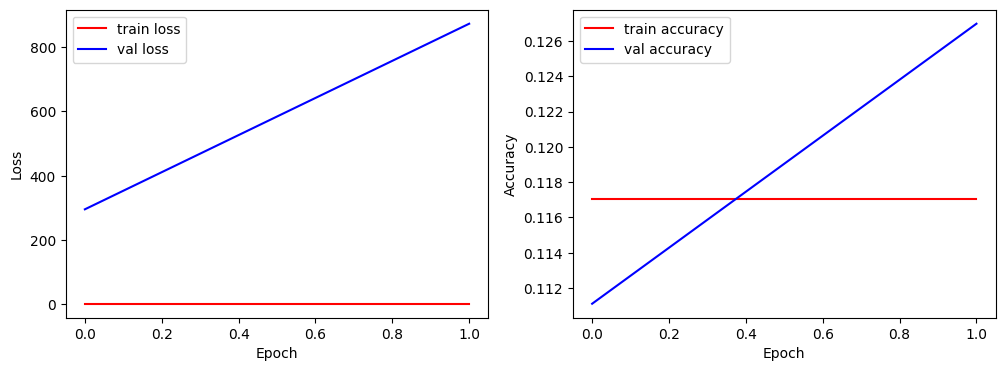

In [16]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

ax[0].plot(history.history["loss"], c="r", label="train loss")

ax[0].plot(history.history["val_loss"], c="b", label="val loss")

ax[0].set_xlabel("Epoch")

ax[0].set_ylabel("Loss")

ax[0].legend()

ax[1].plot(history.history["accuracy"], c="r", label="train accuracy")

ax[1].plot(history.history["val_accuracy"], c="b", label="val accuracy")

ax[1].set_xlabel("Epoch")

ax[1].set_ylabel("Accuracy")

ax[1].legend()



## 이미지분류실습

### 한식이미지 분류모형

In [1]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  

print(gpus)  

if gpus:  

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

        print(e)

[]


In [19]:
import glob

from PIL import Image

import glob

all_images=[]

all_labels=[]

img_size=(96,96)

for f in glob.glob('c:\\data\\foods\\**\\*.jpg', recursive=True):

    arr=f.split('\\')

    img = Image.open(f)

    img_resize = img.resize((img_size[0], img_size[1]))

    all_images.append(img_resize)

    label=0

    if arr[3]=='Chicken':

        label=0

    elif arr[3]=='Dolsot':

        label=1

    elif arr[3]=='Jeyug':

        label=2

    elif arr[3]=='Kimchi':

        label=3

    elif arr[3]=='Samgyeob':

        label=4

    elif arr[3]=='Soybean':                                        

        label=5

    all_labels.append(label)



In [20]:
import numpy as np

X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:

    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))

X.shape    

(239, 96, 96, 3)

In [21]:
X = np.delete(X, (0), axis=0)

In [22]:
X.shape  

(238, 96, 96, 3)

In [23]:
y=np.array(all_labels)

y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
all_images

[<PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB size=96x96>,
 <PIL.Image.Image image mode=RGB s

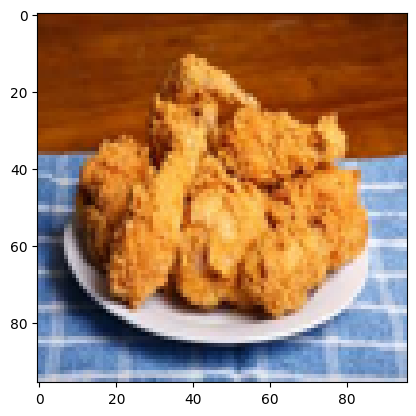

In [25]:
import matplotlib.pyplot as plt

plt.imshow(all_images[0])

plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True,  random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190, 96, 96, 3), (48, 96, 96, 3), (190,), (48,))

In [27]:
import pandas as pd

pd.DataFrame(y_train).value_counts()

0    190
Name: count, dtype: int64

In [28]:
X_train=X_train.reshape(-1,img_size[0]*img_size[1]*3)

X_test=X_test.reshape(-1,img_size[0]*img_size[1]*3)

In [29]:
X_train=X_train/255.

X_test=X_test/255.



In [30]:
X_train=X_train.reshape(-1,img_size[0],img_size[1],3)

X_test=X_test.reshape(-1,img_size[0],img_size[1],3)

y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
from tensorflow.keras import utils

y_train_backup=y_train

y_test_backup=y_test

y_train=utils.to_categorical(y_train,6)

y_test=utils.to_categorical(y_test,6)

y_train[:5]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

model=Sequential()

model.add(Conv2D(64,(3,3),padding="same", input_shape=X_train.shape[1:],activation='tanh'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation="tanh"))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,(3,3),activation="tanh"))

model.add(Flatten())

model.add(Dense(64,activation="relu"))

model.add(Dense(32,activation="relu"))

model.add(Dense(6,activation="softmax"))  

model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 7056)              0

In [33]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("c:/data/model/food_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[checkpoint])

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.3903 - accuracy: 0.7895
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to c:/data/model\food_best.h5
5/5 [==============================] - 2s 331ms/step - loss: 0.3903 - accuracy: 0.7895 - val_loss: 9.9713e-05 - val_accuracy: 1.0000
Epoch 2/100


C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - ETA: 0s - loss: 1.0260e-04 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
5/5 [==============================] - 2s 308ms/step - loss: 1.0260e-04 - accuracy: 1.0000 - val_loss: 4.7542e-05 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 5.5225e-05 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
5/5 [==============================] - 1s 277ms/step - loss: 5.5225e-05 - accuracy: 1.0000 - val_loss: 2.8950e-05 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 3.6256e-05 - accuracy: 1.0000
Epoch 4: val_accuracy did not improve from 1.00000
5/5 [==============================] - 1s 277ms/step - loss: 3.6256e-05 - accuracy: 1.0000 - val_loss: 1.9806e-05 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 2.5504e-05 - accuracy: 1.0000
Epoch 5: val_accuracy did not improve from 1.00000
5/5 [====

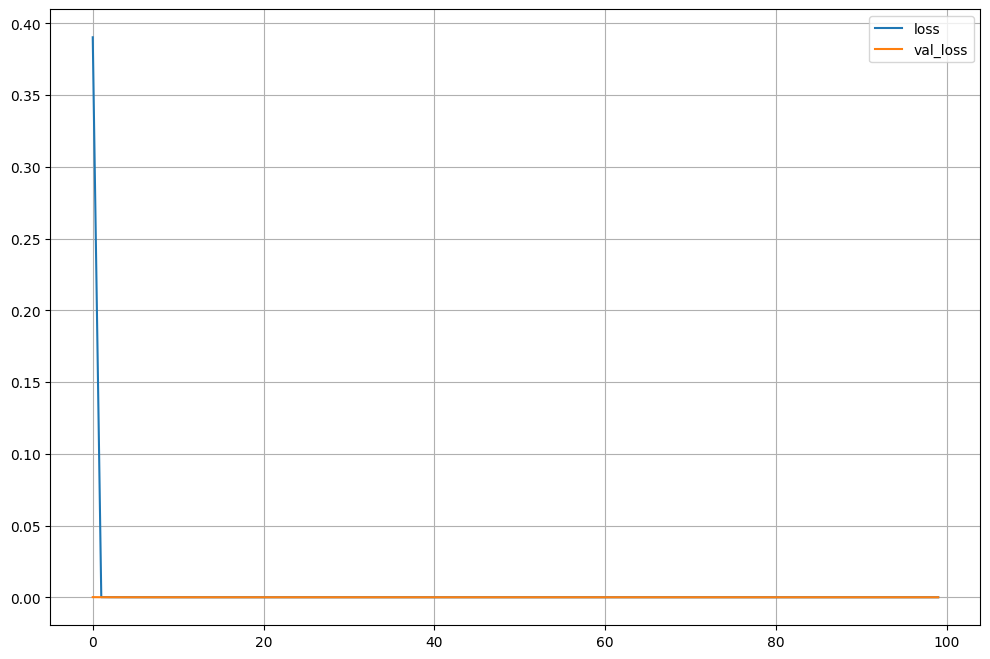

In [34]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])

plt.legend(['loss','val_loss'])

plt.grid()

plt.show()

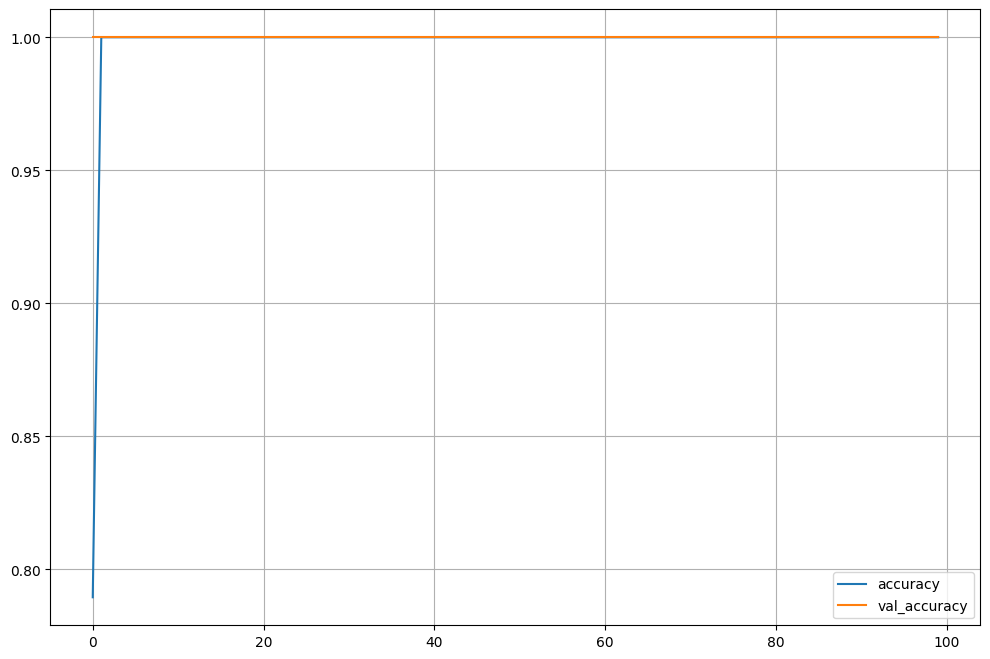

In [35]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['accuracy'])

plt.plot(hist.history['val_accuracy'])

plt.legend(['accuracy','val_accuracy'])

plt.grid()

plt.show()

In [36]:
from tensorflow.keras.models import load_model

model = load_model('c:/data/model/food_best.h5')

scores = model.evaluate(X_train, y_train, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

6/6 [==============================] - 0s 52ms/step - loss: 1.2679e-04 - accuracy: 1.0000
[0.0001267937186639756, 1.0]
accuracy: 100.00%


In [37]:
scores = model.evaluate(X_test, y_test, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

2/2 [==============================] - 0s 31ms/step - loss: 1.1326e-04 - accuracy: 1.0000
[0.00011325662489980459, 1.0]
accuracy: 100.00%


In [38]:
pred=model.predict(X_test)

np.argmax(pred,axis=1)

2/2 [==============================] - 0s 27ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test_backup, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



### Xray 이미지로 회귀모형- 남자 나이맞추기

In [2]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  

print(gpus)  

if gpus:  

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

        print(e)

[]


In [3]:
import glob

from PIL import Image

import numpy as np

import glob

all_images=[]

all_labels=[]

filenames=[]

ages=[]

img_size=(80,100)

for f in glob.glob('c:\\data\\xray\\**\\*.jpg', recursive=True):

    arr=f.split('\\')

    arr2=arr[3].split("_")

    if arr2[1]=='M':

        img = Image.open(f)

        filenames.append(arr[-1])

        img_resize = img.resize((img_size[0], img_size[1]))

        all_images.append(img_resize)

        age=int(arr2[2].replace('yr',''))

        ages.append(age)

In [4]:
filenames[:10]

['332_M.jpg',
 '333_M.jpg',
 '334_M.jpg',
 '335_M.jpg',
 '336_M.jpg',
 '337_M.jpg',
 '338_M.jpg',
 '339_M.jpg',
 '340_M.jpg',
 '341_M.jpg']

In [5]:
items=list(zip(filenames,ages,all_images))

items[:10]

[('332_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('333_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('334_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('335_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('336_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('337_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('338_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('339_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('340_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('341_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>)]

In [6]:
len(all_images)

665

In [7]:
np.array(all_images[0]).shape

(100, 80, 3)

In [8]:
X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:

    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))

X.shape   

(666, 80, 100, 3)

In [9]:
X = np.delete(X, (0), axis=0)

In [10]:
X.shape  

(665, 80, 100, 3)

In [11]:
y=np.array(ages)

y[:10]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

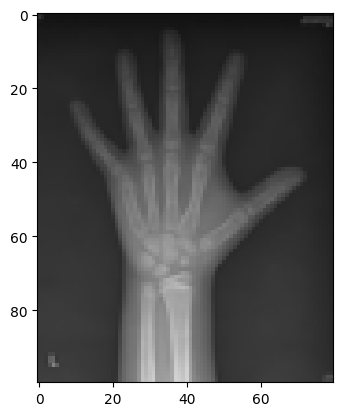

In [12]:
import matplotlib.pyplot as plt

plt.imshow(all_images[0])

plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True,  random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((532, 80, 100, 3), (133, 80, 100, 3), (532,), (133,))

In [14]:
import pandas as pd

pd.DataFrame(y_train).value_counts()

4     40
5     40
6     40
7     40
8     40
9     40
10    40
11    40
12    40
13    40
14    40
15    36
3     25
16    24
17     7
Name: count, dtype: int64

In [15]:
X_train=X_train.reshape(-1,img_size[0]*img_size[1]*3)

X_test=X_test.reshape(-1,img_size[0]*img_size[1]*3)

In [16]:
X_train=X_train/255.

X_test=X_test/255.

In [17]:
X_train=X_train.reshape(-1,img_size[0],img_size[1],3)
X_test=X_test.reshape(-1,img_size[0],img_size[1],3)

In [18]:
from tensorflow.keras import utils

y_train_backup=y_train

y_test_backup=y_test

In [19]:
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model=Sequential()

model.add(Conv2D(64,(3,3),padding="same", input_shape=X_train.shape[1:],activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))

model.add(Flatten())

model.add(Dense(64,activation="relu"))

model.add(Dense(1))          

model.compile(optimizer="rmsprop", loss="mae",metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 100, 64)       1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 50, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 48, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 19, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 23936)             0

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((532, 80, 100, 3), (532,), (133, 80, 100, 3), (133,))

In [21]:
from keras.callbacks import ModelCheckpoint

In [22]:
checkpoint = ModelCheckpoint("c:/data/model/xray_m_best.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=30, callbacks=[checkpoint])

Epoch 1/30


14/14 [==============================] - ETA: 0s - loss: 6.7650 - mae: 6.7650
Epoch 1: val_loss improved from inf to 4.36212, saving model to c:/data/model\xray_m_best.h5
14/14 [==============================] - 5s 285ms/step - loss: 6.7650 - mae: 6.7650 - val_loss: 4.3621 - val_mae: 4.3621
Epoch 2/30


C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - ETA: 0s - loss: 3.7964 - mae: 3.7964
Epoch 2: val_loss improved from 4.36212 to 3.34153, saving model to c:/data/model\xray_m_best.h5
14/14 [==============================] - 4s 277ms/step - loss: 3.7964 - mae: 3.7964 - val_loss: 3.3415 - val_mae: 3.3415
Epoch 3/30
14/14 [==============================] - ETA: 0s - loss: 3.7630 - mae: 3.7630
Epoch 3: val_loss improved from 3.34153 to 3.11214, saving model to c:/data/model\xray_m_best.h5
14/14 [==============================] - 4s 277ms/step - loss: 3.7630 - mae: 3.7630 - val_loss: 3.1121 - val_mae: 3.1121
Epoch 4/30
14/14 [==============================] - ETA: 0s - loss: 3.6403 - mae: 3.6403
Epoch 4: val_loss did not improve from 3.11214
14/14 [==============================] - 4s 272ms/step - loss: 3.6403 - mae: 3.6403 - val_loss: 4.1112 - val_mae: 4.1112
Epoch 5/30
14/14 [==============================] - ETA: 0s - loss: 3.2619 - mae: 3.2619
Epoch 5: val_loss did not improve from 3.11214
14/1

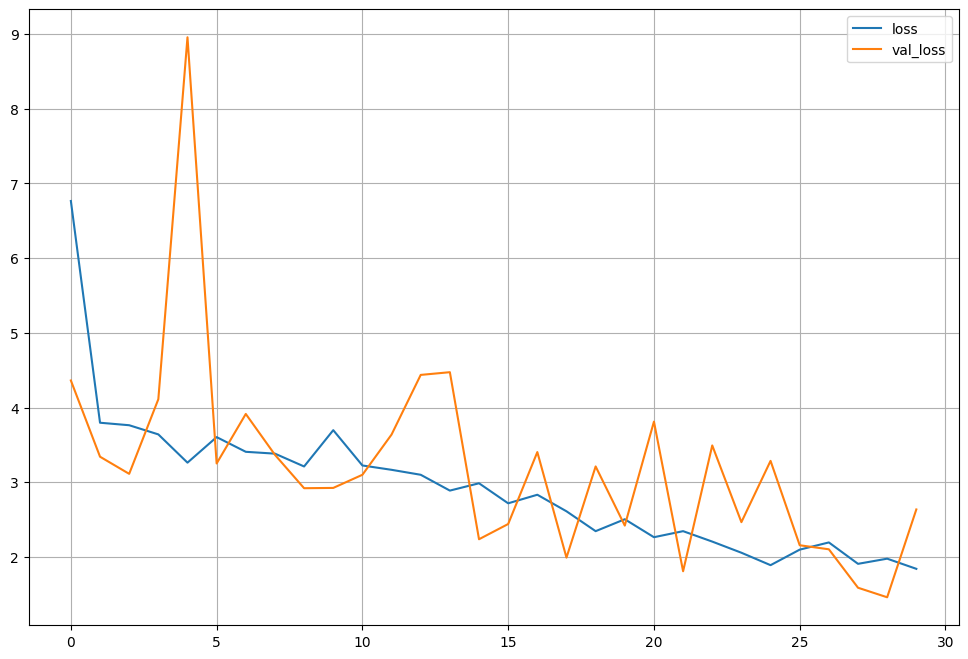

In [23]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])

plt.legend(['loss','val_loss'])

plt.grid()

plt.show()

In [24]:
from tensorflow.keras.models import load_model

model = load_model('c:/data/model/xray_m_best.h5')

scores = model.evaluate(X_train, y_train, verbose=1)

print(scores)

17/17 [==============================] - 1s 53ms/step - loss: 1.3283 - mae: 1.3283
[1.3283218145370483, 1.3283218145370483]


In [25]:
model = load_model('c:/data/model/xray_m_best.h5')

scores = model.evaluate(X_test, y_test, verbose=1)

print(scores)

5/5 [==============================] - 0s 43ms/step - loss: 1.6514 - mae: 1.6514
[1.651367425918579, 1.651367425918579]


In [26]:
pred=model.predict(X_test)

pred[:5]

5/5 [==============================] - 0s 42ms/step


array([[ 9.376969 ],
       [ 7.3480225],
       [10.954988 ],
       [11.695695 ],
       [ 4.1301384]], dtype=float32)

In [27]:
y_test[:5]

array([10,  9, 13, 11,  5])

### Xray 이미지로 회귀모형- 여자 나이맞추기

In [29]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  

print(gpus)  

if gpus:  

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

        print(e)

[]


In [31]:
import glob

from PIL import Image

import numpy as np

import glob

all_images=[]

all_labels=[]

filenames=[]

ages=[]

img_size=(80,100)

for f in glob.glob('c:\\data\\xray\\**\\*.jpg', recursive=True):

    arr=f.split('\\')

    arr2=arr[3].split("_")

    if arr2[1]=='F':

        img = Image.open(f)

        filenames.append(arr[-1])

        img_resize = img.resize((img_size[0], img_size[1]))

        all_images.append(img_resize)

        age=int(arr2[2].replace('yr',''))

        ages.append(age)

In [32]:
filenames[:10]

['310_F.jpg',
 '311_F.jpg',
 '312_F.jpg',
 '313_F.jpg',
 '314_F.jpg',
 '315_F.jpg',
 '316_F.jpg',
 '317_F.jpg',
 '318_F.jpg',
 '319_F.jpg']

In [33]:
items=list(zip(filenames,ages,all_images))

items[:10]

[('310_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('311_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('312_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('313_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('314_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('315_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('316_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('317_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('318_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('319_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>)]

In [34]:
len(all_images)

572

In [35]:
np.array(all_images[0]).shape

(100, 80, 3)

In [36]:
X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:

    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))

X.shape   

(573, 80, 100, 3)

In [37]:
X = np.delete(X, (0), axis=0)

In [38]:
X.shape 

(572, 80, 100, 3)

In [39]:
y=np.array(ages)

y[:10]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

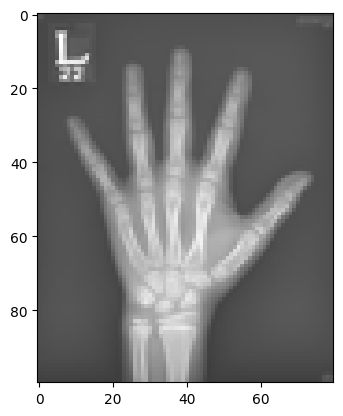

In [40]:
import matplotlib.pyplot as plt

plt.imshow(all_images[0])

plt.show()



In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True,  random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((457, 80, 100, 3), (115, 80, 100, 3), (457,), (115,))

In [42]:
import pandas as pd

pd.DataFrame(y_train).value_counts()

5     49
6     40
8     40
9     40
10    40
11    40
12    40
7     37
13    36
14    29
4     26
3     15
15    15
16    10
Name: count, dtype: int64

In [43]:
X_train=X_train.reshape(-1,img_size[0]*img_size[1]*3)

X_test=X_test.reshape(-1,img_size[0]*img_size[1]*3)

In [44]:
X_train=X_train/255.

X_test=X_test/255.

In [45]:
X_train=X_train.reshape(-1,img_size[0],img_size[1],3)
X_test=X_test.reshape(-1,img_size[0],img_size[1],3)

In [46]:
from tensorflow.keras import utils

y_train_backup=y_train

y_test_backup=y_test

In [47]:
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

model=Sequential()

model.add(Conv2D(64,(3,3),padding="same", input_shape=X_train.shape[1:],activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))

model.add(Flatten())

model.add(Dense(64,activation="relu"))

model.add(Dense(1))          

model.compile(optimizer="rmsprop", loss="mae",metrics=["mae"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 80, 100, 64)       1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 40, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 38, 48, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 19, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 22, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 23936)            

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((457, 80, 100, 3), (457,), (115, 80, 100, 3), (115,))

In [49]:
from keras.callbacks import ModelCheckpoint

In [50]:
checkpoint = ModelCheckpoint("c:/data/model/xray_f_best.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=30, callbacks=[checkpoint])

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 7.8512 - mae: 7.8512
Epoch 1: val_loss improved from inf to 3.28789, saving model to c:/data/model\xray_f_best.h5
12/12 [==============================] - 5s 346ms/step - loss: 7.8512 - mae: 7.8512 - val_loss: 3.2879 - val_mae: 3.2879
Epoch 2/30


C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - ETA: 0s - loss: 3.2273 - mae: 3.2273
Epoch 2: val_loss did not improve from 3.28789
12/12 [==============================] - 3s 275ms/step - loss: 3.2273 - mae: 3.2273 - val_loss: 4.0824 - val_mae: 4.0824
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 3.4615 - mae: 3.4615
Epoch 3: val_loss did not improve from 3.28789
12/12 [==============================] - 3s 275ms/step - loss: 3.4615 - mae: 3.4615 - val_loss: 4.1877 - val_mae: 4.1877
Epoch 4/30
12/12 [==============================] - ETA: 0s - loss: 3.3605 - mae: 3.3605
Epoch 4: val_loss improved from 3.28789 to 2.89399, saving model to c:/data/model\xray_f_best.h5
12/12 [==============================] - 3s 284ms/step - loss: 3.3605 - mae: 3.3605 - val_loss: 2.8940 - val_mae: 2.8940
Epoch 5/30
12/12 [==============================] - ETA: 0s - loss: 3.1447 - mae: 3.1447
Epoch 5: val_loss did not improve from 2.89399
12/12 [==============================] - 4s 309ms/step

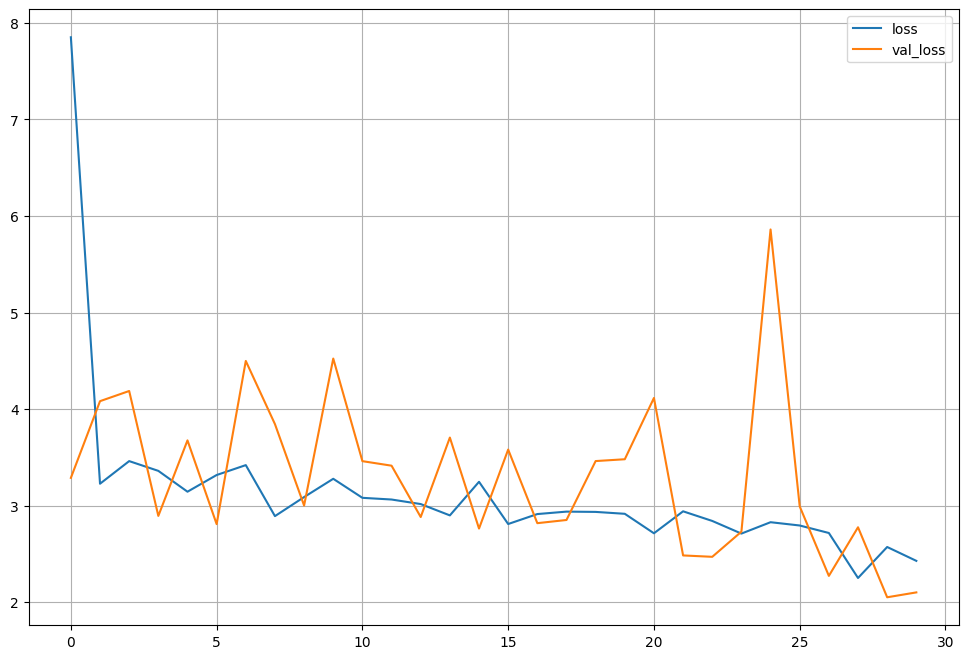

In [51]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])

plt.legend(['loss','val_loss'])

plt.grid()

plt.show()

In [52]:
from tensorflow.keras.models import load_model

model = load_model('c:/data/model/xray_f_best.h5')

scores = model.evaluate(X_train, y_train, verbose=1)

print(scores)

15/15 [==============================] - 1s 49ms/step - loss: 1.9322 - mae: 1.9322
[1.9322203397750854, 1.9322203397750854]


In [53]:
model = load_model('c:/data/model/xray_f_best.h5')

scores = model.evaluate(X_test, y_test, verbose=1)

print(scores)

4/4 [==============================] - 0s 49ms/step - loss: 2.0661 - mae: 2.0661
[2.0661277770996094, 2.0661277770996094]


In [54]:
pred=model.predict(X_test)

pred[:5]



4/4 [==============================] - 0s 46ms/step


array([[ 5.6349583],
       [ 4.4242735],
       [ 9.967946 ],
       [10.531844 ],
       [ 9.237541 ]], dtype=float32)

In [55]:
y_test[:5]

array([ 5,  4, 15, 13, 10])

* 파워미터모형

In [1]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  

print(gpus)  

if gpus:  

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [57]:
import glob

from PIL import Image

import glob

all_images=[]

img_size=(32,20)

labels=[]

for f in glob.glob('c:\\data\\power\\**\\*.jpg', recursive=True):

    arr=f.split('\\')

    img = Image.open(f)

    img_resize = img.resize((img_size[0], img_size[1]))

    all_images.append(img_resize)

    label=float(arr[3])

    labels.append(label)

In [58]:
labels[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [59]:
len(labels)

12319

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_16048\2384085600.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


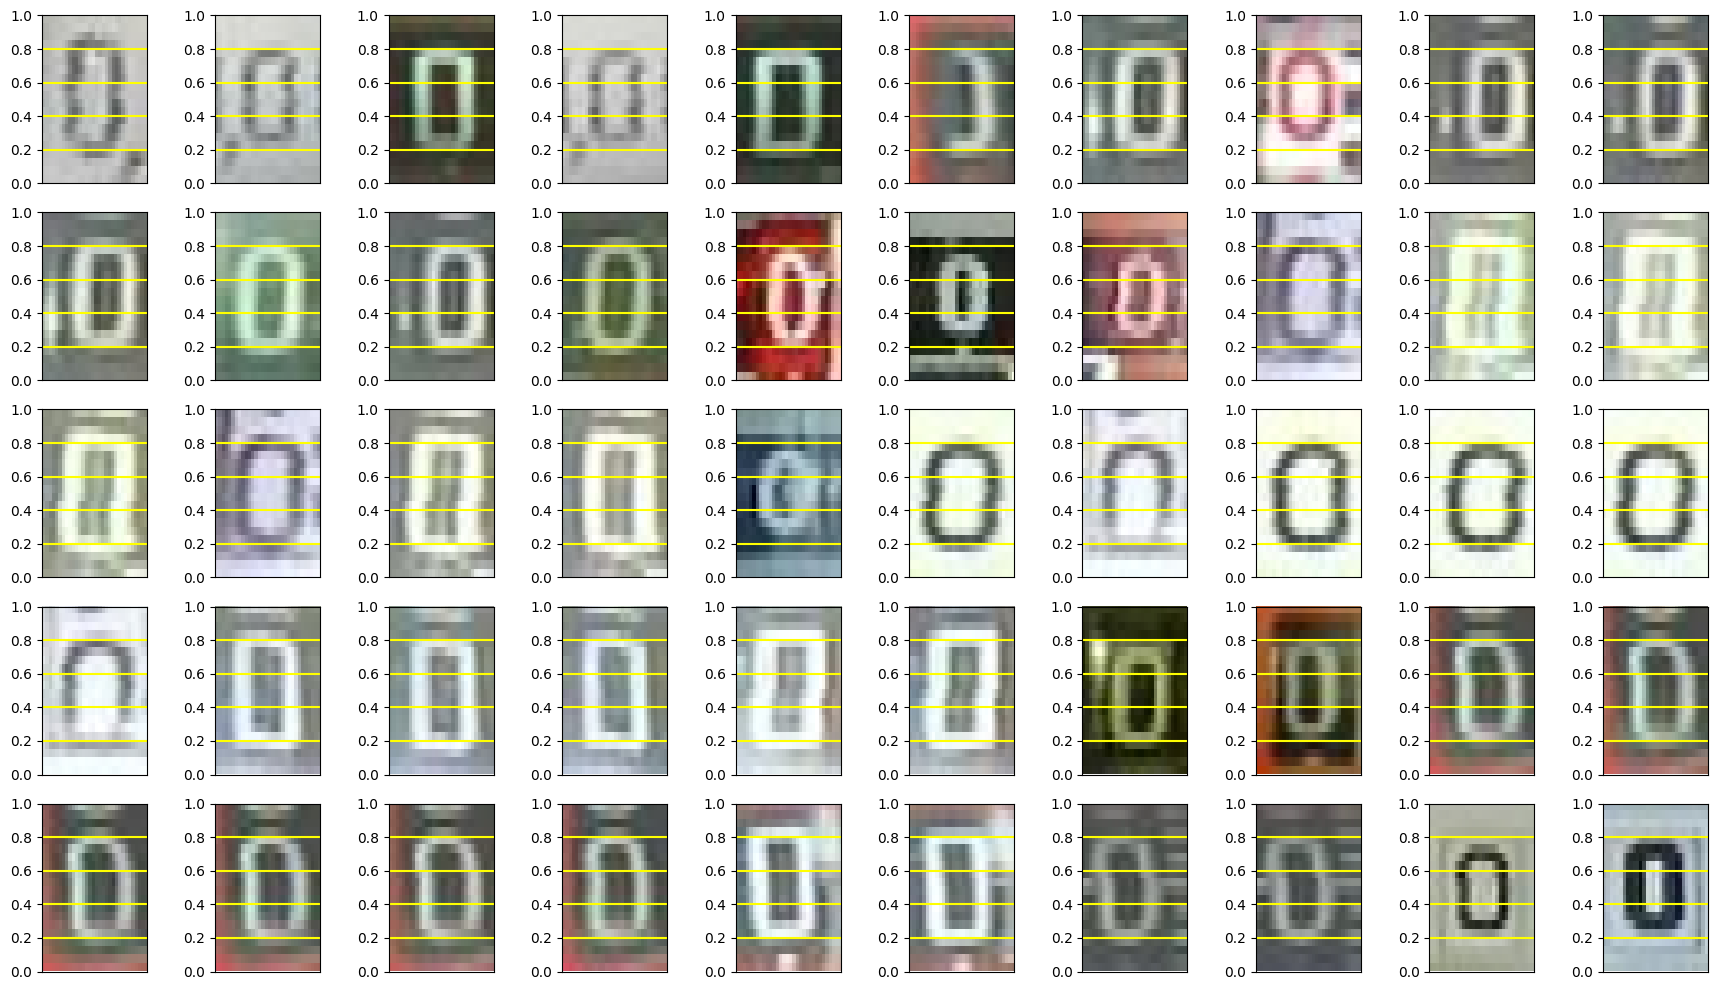

In [60]:
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure(figsize=(18, 10))

columns = 10

rows = 5

for i in range(1, columns*rows +1):

    if i>len(all_images):

        break

    fig.add_subplot(rows, columns, i)

    plt.xticks([0.2, 0.4, 0.6, 0.8])

    plt.imshow((all_images[i-1]), aspect='1.6', extent=[0, 1, 0, 1])

    for y in np.arange(0.2, 0.8, 0.2):

        plt.axhline(y=y,color='yellow')

    ax=plt.gca()

    ax.get_xaxis().set_visible(False)

    plt.tight_layout()

    

plt.show()

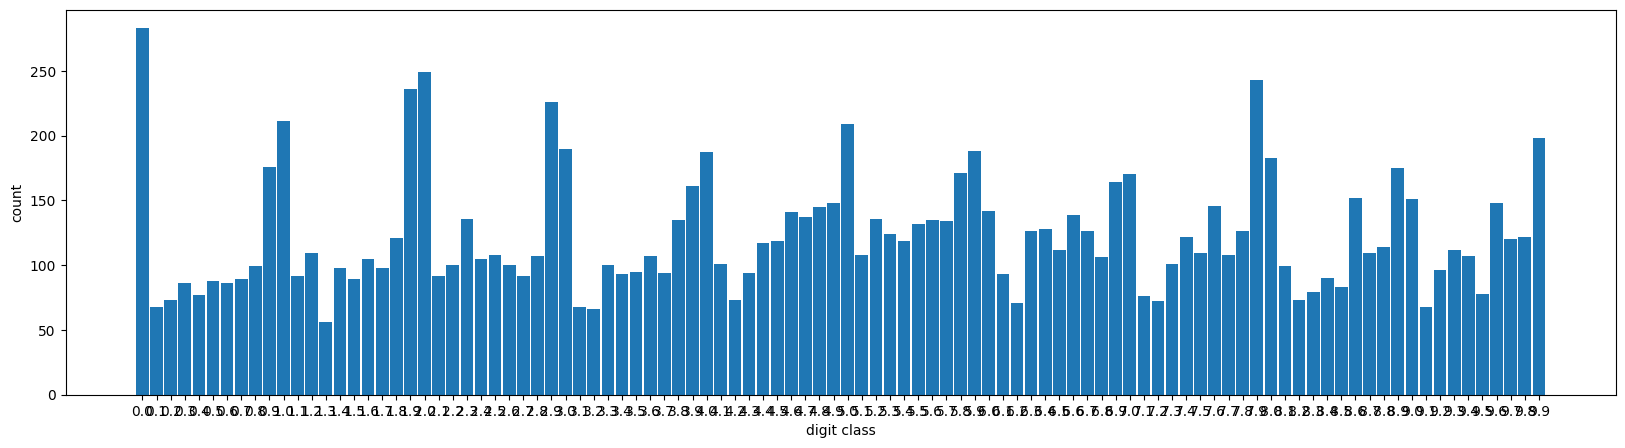

In [61]:
_, inverse = np.unique(labels, return_inverse=True)

data_bincount = np.bincount(inverse)

plt.figure(figsize=(20,5))

plt.bar(np.arange (0, 10, 0.1), data_bincount, width=0.09, align='center')

plt.ylabel('count')

plt.xlabel('digit class')

plt.xticks(np.arange(0, 10, 0.1))

plt.show()

In [62]:
#오래걸림

X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:

    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))

X.shape 

(12320, 32, 20, 3)

In [63]:
X = np.delete(X, (0), axis=0)  # vstack할때 맨처음에 empty 값에 붙여서 처음꺼 없애주기

In [64]:
X.shape

(12319, 32, 20, 3)

In [65]:
x_data=X/255.

x_data

array([[[[0.71764706, 0.72156863, 0.69803922],
         [0.71764706, 0.72156863, 0.69803922],
         [0.72156863, 0.7254902 , 0.69803922],
         ...,
         [0.78823529, 0.79215686, 0.76862745],
         [0.81960784, 0.82352941, 0.8       ],
         [0.80392157, 0.80784314, 0.78431373]],

        [[0.8       , 0.80392157, 0.78039216],
         [0.81176471, 0.81568627, 0.79215686],
         [0.77647059, 0.78039216, 0.75686275],
         ...,
         [0.74117647, 0.74509804, 0.7254902 ],
         [0.74509804, 0.74901961, 0.7254902 ],
         [0.75686275, 0.76078431, 0.74117647]],

        [[0.77647059, 0.78039216, 0.76078431],
         [0.79215686, 0.79607843, 0.77647059],
         [0.80392157, 0.80784314, 0.78823529],
         ...,
         [0.78823529, 0.78823529, 0.76078431],
         [0.8       , 0.8       , 0.76862745],
         [0.80392157, 0.80392157, 0.77254902]],

        ...,

        [[0.78431373, 0.78431373, 0.78431373],
         [0.76470588, 0.76470588, 0.76470588]

In [66]:
y_data=np.array(labels)

y_data

array([0. , 0. , 0. , ..., 9.9, 9.9, 9.9])

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,  shuffle=True,  random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9855, 32, 20, 3), (2464, 32, 20, 3), (9855,), (2464,))

In [68]:
from keras.models import Sequential

from keras.layers import *

model = Sequential()

model.add(BatchNormalization(input_shape=(32,20,3))) # 미니배치의 출력값을 정규화

model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128,activation="relu"))

model.add(Dropout(0.4))

model.add(Dense(1, activation = None))

model.compile(loss='mae', optimizer="rmsprop", metrics = ["mae"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 32, 20, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 20, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 32, 20, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 10, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 10, 32)        0         
                                                      

In [1]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("c:/data/model/power_best.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=40, callbacks=[checkpoint])

ImportError: cannot import name 'builder' from 'google.protobuf.internal' (c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\internal\__init__.py)

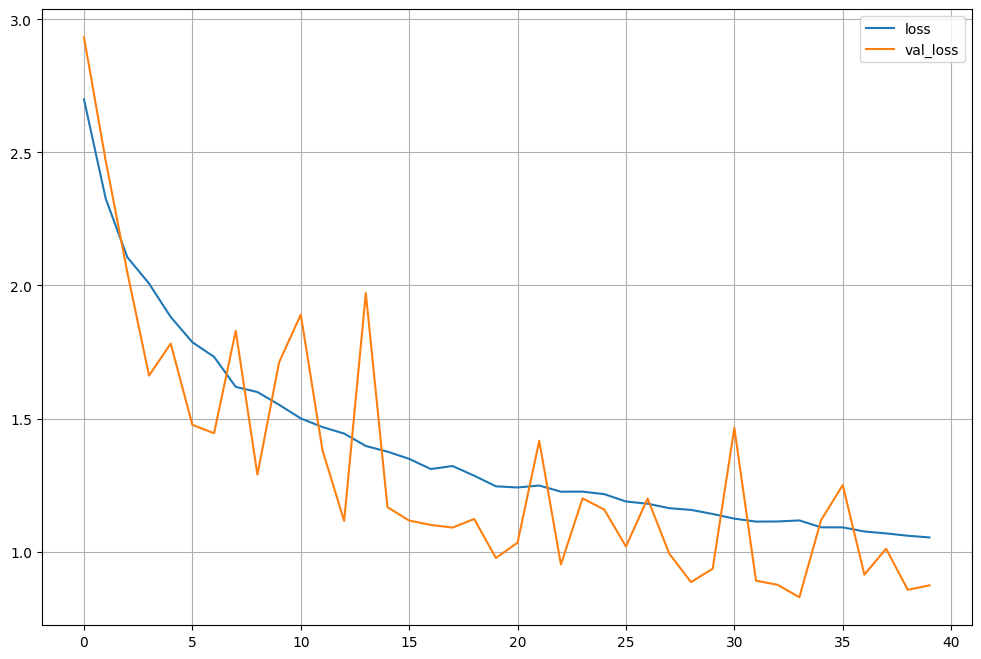

In [70]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])

plt.legend(['loss','val_loss'])

plt.grid()

plt.show()

In [71]:
from tensorflow.keras.models import load_model

model = load_model('c:/data/model/power_best.h5')

scores = model.evaluate(X_train, y_train, verbose=1)

print(scores)

308/308 [==============================] - 2s 5ms/step - loss: 0.7061 - mae: 0.7061
[0.7060983777046204, 0.7060983777046204]


In [72]:
model = load_model('c:/data/model/power_best.h5')

scores = model.evaluate(X_test, y_test, verbose=1)

print(scores)

77/77 [==============================] - 1s 5ms/step - loss: 0.8237 - mae: 0.8237
[0.8236745595932007, 0.8236745595932007]


In [73]:
pred=model.predict(X_test)

pred[:5]

77/77 [==============================] - 0s 5ms/step


array([[ 5.714979  ],
       [ 5.672195  ],
       [ 4.4352174 ],
       [ 5.5681148 ],
       [-0.03502333]], dtype=float32)

In [74]:
y_test[:5]



array([5.8, 8.1, 4. , 8. , 0.2])

In [2]:
# !pip uninstall tensorflow   
# !pip uninstall tensorboard   
# !pip uninstall tensorboard-data-server         
# !pip uninstall tensorboard-plugin-wit           
# !pip uninstall tensorflow-estimator            
# !pip uninstall tensorflow-intel  
# !pip uninstall tensorflow-io-gcs-filesystem  
# !pip uninstall keras
# !pip install tensorflow-gpu==2.10.0

^C


### 뇌종양 분석

In [2]:
#CNN 뇌종양 분류 모형

import os

import cv2

import tensorflow as tf

import numpy  as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import layers

from sklearn.metrics import classification_report

from keras.utils import plot_model

from tensorflow import keras

import warnings

from IPython.display import HTML, display

warnings.filterwarnings("ignore")

In [4]:
def read_images(folder_path,image_size =(256,256)):

    image_list = []

    label_list = []

    

    for root, subdirs, files in os.walk(folder_path):

        for subdir in subdirs:

            label = subdir

            

            subdir_path = os.path.join(root, subdir)

            for file in os.listdir(subdir_path):

                image_path = os.path.join(subdir_path, file)

                

                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                image = cv2.resize(image, image_size)

                

                image_list.append(image)

                label_list.append(label)

                

    images = np.array(image_list)

    labels = np.array(label_list)

    

    return images, labels

In [8]:
training_images, training_labels = read_images("d:/data/brain_mri/Training")

testing_images , testing_labels  = read_images("d:/data/brain_mri/Testing")

In [9]:
print(training_images.shape,training_labels.shape)

print(testing_images.shape ,testing_labels.shape)

(5712, 256, 256) (5712,)
(1311, 256, 256) (1311,)



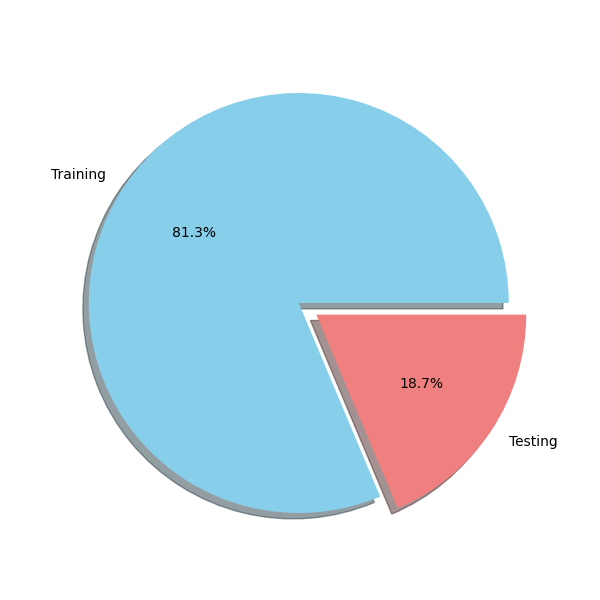

In [10]:
train_size = len(training_images)

test_size = len(testing_images)

sizes = [train_size, test_size]

labels = ['Training', 'Testing']

colors = ['skyblue', 'lightcoral']

explode = (0.1, 0)

plt.figure(figsize=(6, 6))

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)

plt.axis('equal')

plt.savefig('pie-00.png')

plt.close()

with open("pie-00.png", "rb") as img_file:

    img_data = img_file.read()

import base64

img_base64 = base64.b64encode(img_data).decode("utf-8") # 이미지를 코드로 입력

html_code = f'''

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">

    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">

</div>

'''

display(HTML(html_code))


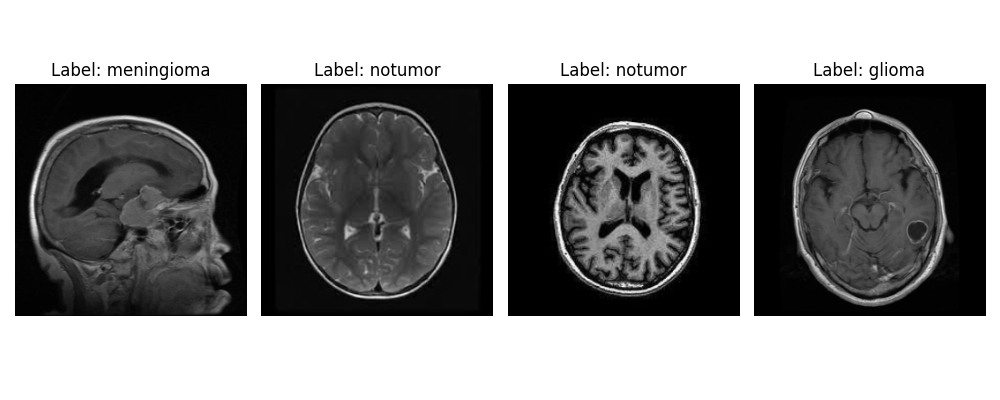

In [11]:
num_images_to_display = 4

random_indices = np.random.choice(len(training_images), size=num_images_to_display, replace=False)

fig, axes = plt.subplots(1, num_images_to_display, figsize=(10, 4))

for i, index in enumerate(random_indices):

    image = training_images[index]

    label = training_labels[index]

    axes[i].imshow(image, cmap='gray')

    axes[i].set_title(f"Label: {label}")

    axes[i].axis('off')

plt.tight_layout()

plt.savefig('output_images.png')  

plt.close()

with open("output_images.png", "rb") as img_file:

    img_data = img_file.read()

import base64

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">

    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">

</div>

'''

display(HTML(html_code))

In [12]:
testing_indices = np.random.permutation(testing_images.shape[0])
testing_images = testing_images[testing_indices] / 255.0
testing_labels = testing_labels[testing_indices]

training_indices = np.random.permutation(training_images.shape[0])
training_images = training_images[training_indices] / 255.0
training_labels = training_labels[training_indices]

print(testing_images.shape, testing_labels.shape)
print(training_images.shape, training_labels.shape)

(1311, 256, 256) (1311,)
(5712, 256, 256) (5712,)


In [13]:
# np.squeeze 크기가 1인 배열 제거
train_images = np.squeeze(training_images)

train_images = np.expand_dims(train_images, axis=-1)

test_images  = np.squeeze(testing_images)

test_images  = np.expand_dims(test_images, axis=-1)

print(train_images.shape)

print(test_images.shape )

(5712, 256, 256, 1)
(1311, 256, 256, 1)


In [14]:
train_labels = np.squeeze(training_labels)

test_labels  = np.squeeze(testing_labels)

print(train_labels.shape,test_labels.shape)

(5712,) (1311,)


In [15]:
print(train_images.shape,test_images.shape)

(5712, 256, 256, 1) (1311, 256, 256, 1)


In [16]:
label_encoder        = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_labels)

test_labels_encoded  = label_encoder.transform(test_labels)

num_classes          = len(label_encoder.classes_)

train_labels_onehot  = to_categorical(train_labels_encoded, num_classes=num_classes)

test_labels_onehot   = to_categorical(test_labels_encoded , num_classes=num_classes)

In [17]:
print(train_labels_encoded.shape)

print(test_labels_encoded.shape)

(5712,)
(1311,)


In [18]:
print(train_labels_onehot.shape)

print(test_labels_onehot.shape)

(5712, 4)
(1311, 4)


In [19]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

num_labels = 4

model.add(layers.Dense(num_labels, activation='softmax'))

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

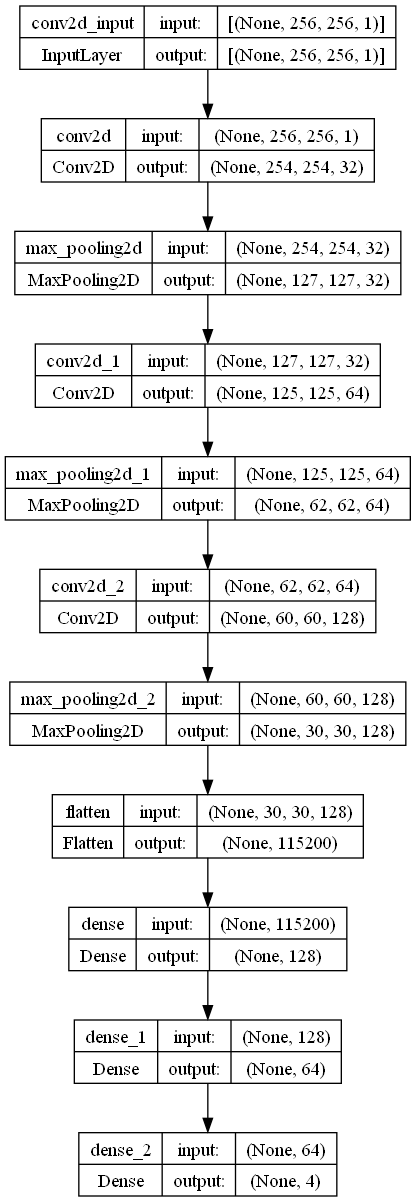

In [20]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)


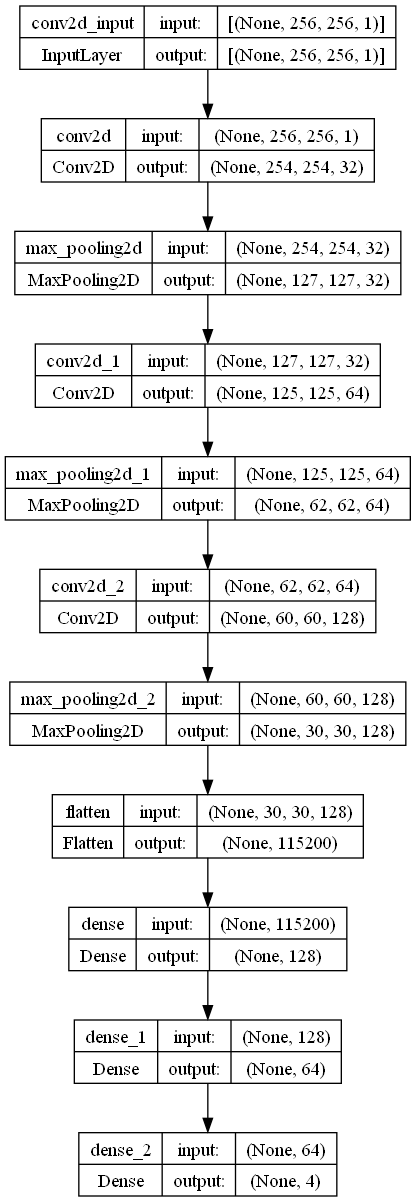

In [21]:
with open("model_plot.png", "rb") as img_file:

    img_data = img_file.read()

    

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">

    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">

</div>
'''

display(HTML(html_code))

In [22]:

# 이미지 data generator

datagen = ImageDataGenerator(

    rotation_range=10,

    width_shift_range=0.05,

    height_shift_range=0.05,

    zoom_range=0.0,

    horizontal_flip=True

)

datagen.fit(train_images)

train_generator = datagen.flow(train_images, train_labels_onehot, batch_size=32)

test_generator  = datagen.flow(test_images , test_labels_onehot , batch_size=32)

In [23]:
print("Train Generator Shape:", train_generator[0][0].shape)

print("Test  Generator Shape:", test_generator[0][0].shape)

Train Generator Shape: (32, 256, 256, 1)
Test  Generator Shape: (32, 256, 256, 1)


In [24]:
model.fit(train_generator, epochs=3,validation_data=test_generator)

Epoch 1/3
179/179 [==============================] - 101s 439ms/step - loss: 0.7627 - accuracy: 0.6777 - val_loss: 0.6054 - val_accuracy: 0.7513
Epoch 2/3
179/179 [==============================] - 39s 215ms/step - loss: 0.4893 - accuracy: 0.8018 - val_loss: 0.5861 - val_accuracy: 0.7498
Epoch 3/3
179/179 [==============================] - 38s 213ms/step - loss: 0.4071 - accuracy: 0.8381 - val_loss: 0.4477 - val_accuracy: 0.8124



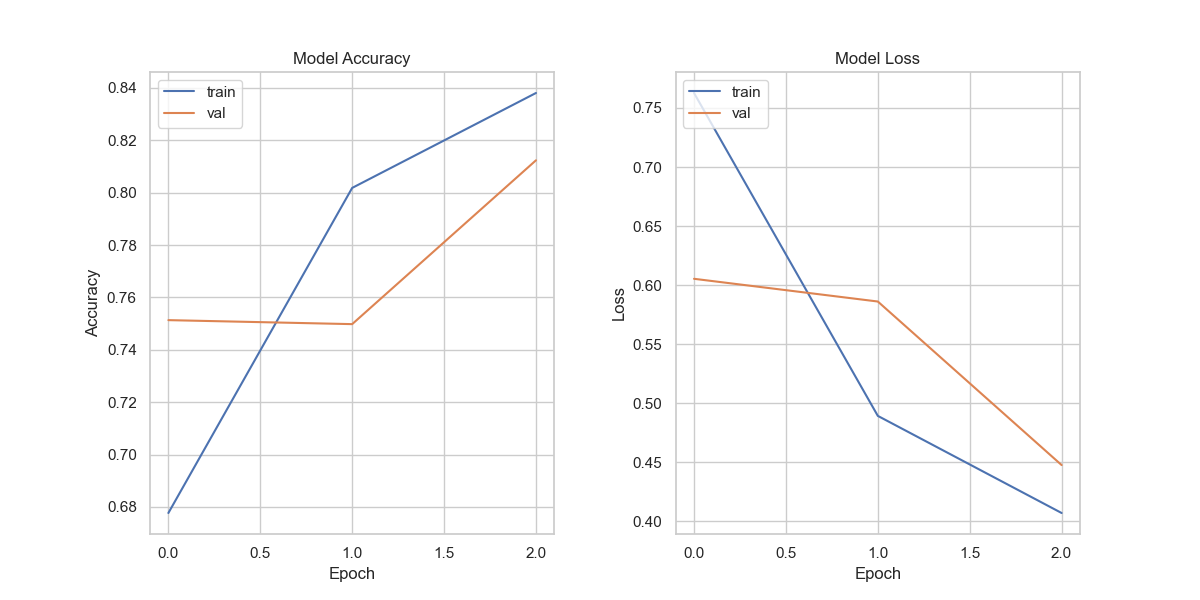

In [25]:
import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import HTML, display

import base64

sns.set(style="whitegrid")

history = model.history

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(history.history['accuracy'])

axes[0].plot(history.history['val_accuracy'])

axes[0].set_title('Model Accuracy')

axes[0].set_xlabel('Epoch')

axes[0].set_ylabel('Accuracy')

axes[0].legend(['train', 'val'], loc='upper left')

axes[1].plot(history.history['loss'])

axes[1].plot(history.history['val_loss'])

axes[1].set_title('Model Loss')

axes[1].set_xlabel('Epoch')

axes[1].set_ylabel('Loss')

axes[1].legend(['train', 'val'], loc='upper left')

plt.subplots_adjust(wspace=0.3)

plt.savefig('combined_plot.png')

plt.close()

with open("combined_plot.png", "rb") as img_file:

    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">

    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">

</div>

'''

display(HTML(html_code))

In [26]:
predictions      = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

target_names     = label_encoder.classes_

print(classification_report(test_labels_encoded, predicted_labels, target_names=target_names))

41/41 [==============================] - 2s 38ms/step
              precision    recall  f1-score   support

      glioma       0.79      0.86      0.82       300
  meningioma       0.79      0.50      0.61       306
     notumor       0.85      0.97      0.90       405
   pituitary       0.89      0.98      0.93       300

    accuracy                           0.84      1311
   macro avg       0.83      0.83      0.82      1311
weighted avg       0.83      0.84      0.82      1311

